# Understand dataset

In [1]:
print("oke")
import torch
print(torch.__version__)
print(torch.cuda.is_available())

oke
2.5.1+cu121
True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
target_col = "stroke"

def format_form(df):
    df = df.drop(columns=["id"])
    df = df.drop(df[df["gender"] == "Other"].index)
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)

    df.columns = df.columns.str.lower()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].str.lower()
    for column in df.select_dtypes(include=['number']).columns:
        if(df[column].nunique() == 2):
            df[column] = df[column].astype(bool)
            df[column] = df[column].replace({True: 'yes', False: 'no'})

    # Get a list of column names grouped by data type
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    # Reorder the columns in the DataFrame
    new_column_order = categorical_cols + numerical_cols
    new_column_order.remove(target_col)
    new_column_order.append(target_col)
    df = df[new_column_order]

    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df

df = format_form(df)
df.head(5).T

,0,1,2,3,4
gender,male,male,female,male,female
hypertension,no,no,no,no,no
heart_disease,no,no,no,no,no
ever_married,yes,yes,yes,yes,no
work_type,private,private,private,private,private
residence_type,urban,rural,rural,urban,rural
smoking_status,never smoked,formerly smoked,unknown,never smoked,never smoked
age,28.0,33.0,42.0,56.0,24.0
avg_glucose_level,79.53,78.44,103.0,64.87,73.36
bmi,31.1,23.9,40.3,28.8,28.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15303 entries, 0 to 15302
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15303 non-null  object 
 1   hypertension       15303 non-null  object 
 2   heart_disease      15303 non-null  object 
 3   ever_married       15303 non-null  object 
 4   work_type          15303 non-null  object 
 5   residence_type     15303 non-null  object 
 6   smoking_status     15303 non-null  object 
 7   age                15303 non-null  float64
 8   avg_glucose_level  15303 non-null  float64
 9   bmi                15303 non-null  float64
 10  stroke             15303 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.3+ MB


# See features

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15303.0,41.419826,21.443773,0.08,26.0,43.00,57.00,82.0
avg_glucose_level,15303.0,89.039396,25.476872,55.22,74.9,85.12,96.98,267.6
bmi,15303.0,28.113382,6.722038,10.30,23.5,27.60,32.00,80.1


In [5]:
df.describe(include='object').T

,count,unique,top,freq
gender,15303,2,female,9446
hypertension,15303,2,no,14542
heart_disease,15303,2,no,14946
ever_married,15303,2,yes,10385
work_type,15303,5,private,9752
residence_type,15303,2,rural,7663
smoking_status,15303,4,never smoked,6281
stroke,15303,2,no,14671


In [6]:
for column in df.select_dtypes(include=['object']).columns:
    # print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

gender
female    9446
male      5857
Name: count, dtype: int64


hypertension
no     14542
yes      761
Name: count, dtype: int64


heart_disease
no     14946
yes      357
Name: count, dtype: int64


ever_married
yes    10385
no      4918
Name: count, dtype: int64


work_type
private          9752
children         2037
self-employed    1939
govt_job         1533
never_worked       42
Name: count, dtype: int64


residence_type
rural    7663
urban    7640
Name: count, dtype: int64


smoking_status
never smoked       6281
unknown            4542
formerly smoked    2337
smokes             2143
Name: count, dtype: int64


stroke
no     14671
yes      632
Name: count, dtype: int64




# Num EDA

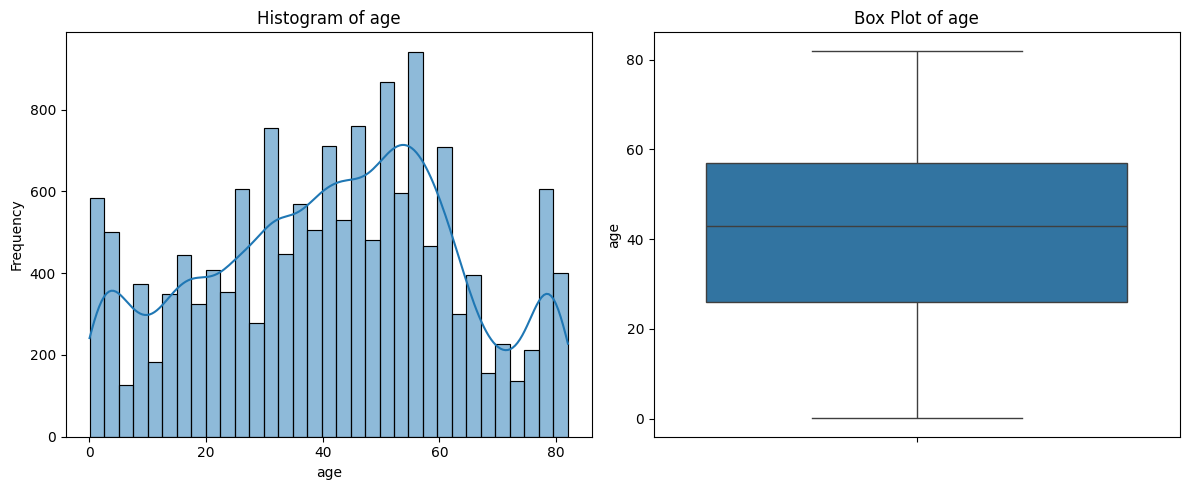

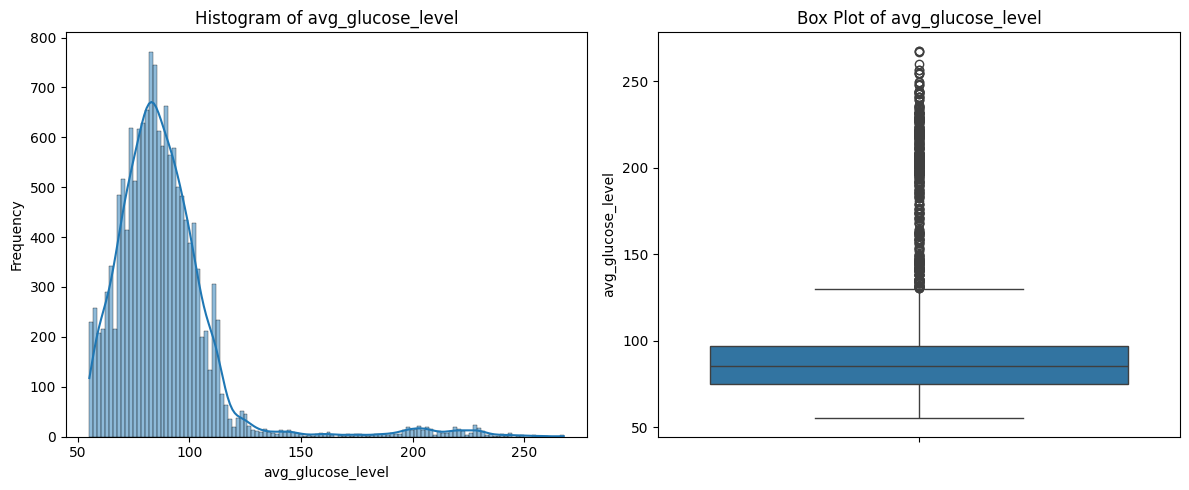

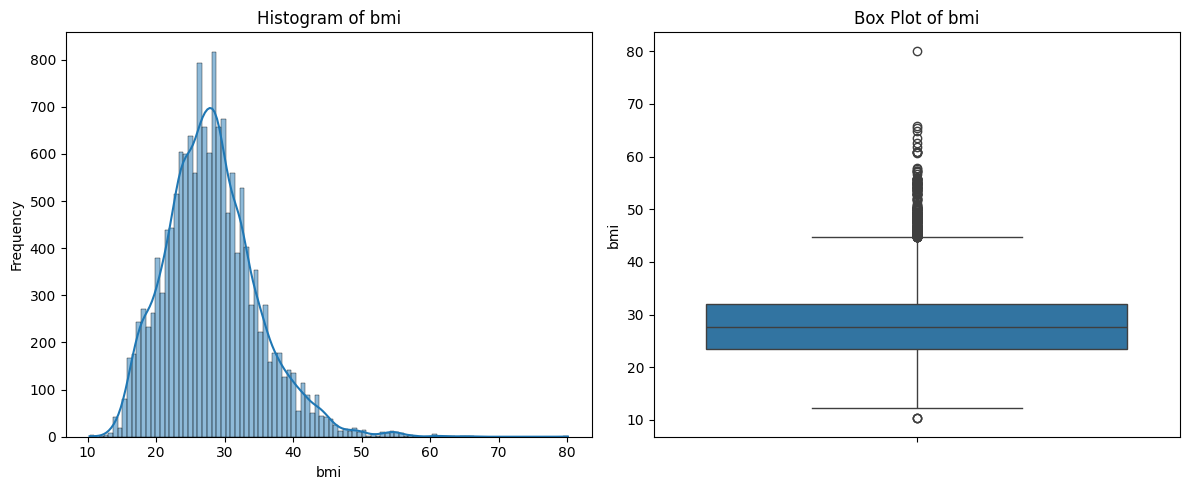

In [7]:
def hist_and_box(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns of subplots

        # Histogram
        sns.histplot(df[col], kde=True, ax=axes[0])  # Plot on the first subplot (axes[0])
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Box plot
        sns.boxplot(y=df[col], ax=axes[1])  # Plot on the second subplot (axes[1])
        axes[1].set_title(f'Box Plot of {col}')
        axes[1].set_ylabel(col)

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()

hist_and_box(df.copy())

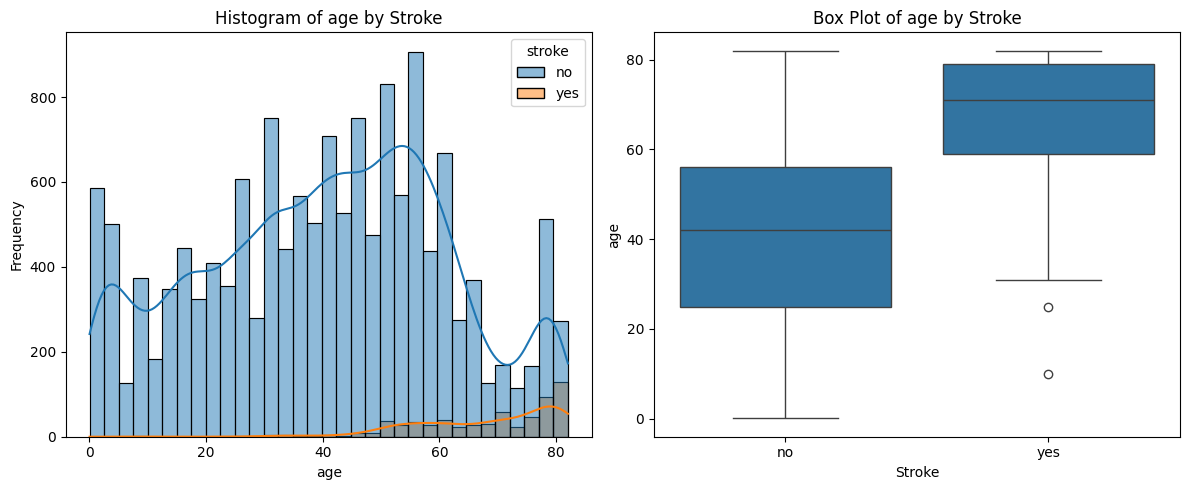

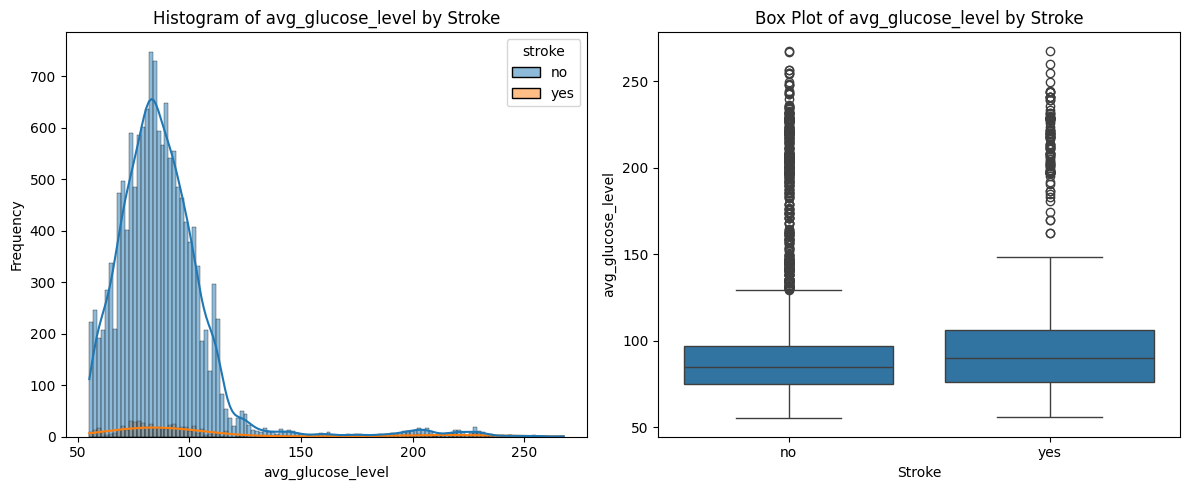

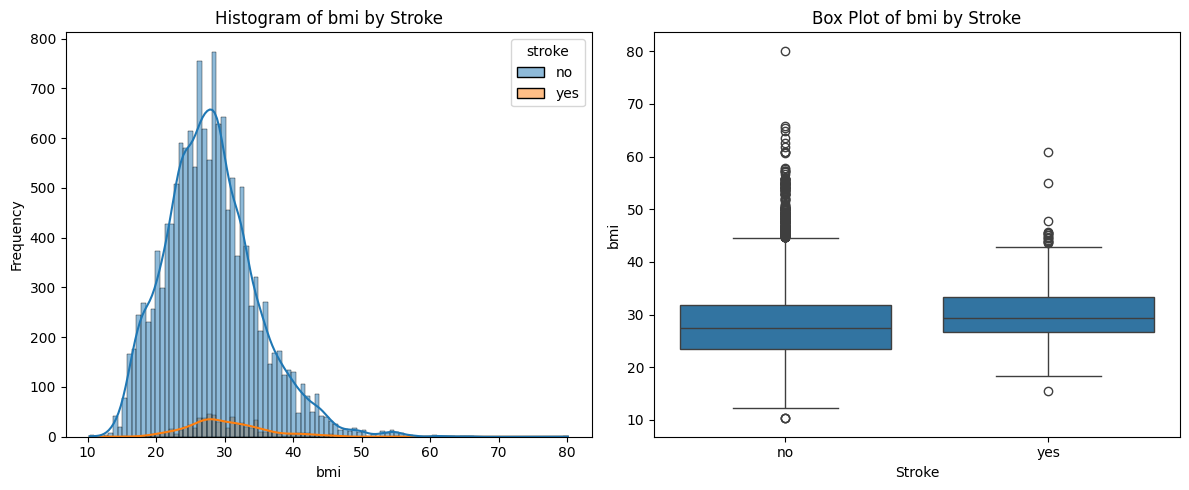

In [8]:
def hist_and_box_hue(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Histogram with hue
        sns.histplot(data=df, x=col, hue='stroke', kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col} by Stroke')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Box plot with hue
        sns.boxplot(data=df, x='stroke', y=col, ax=axes[1])
        axes[1].set_title(f'Box Plot of {col} by Stroke')
        axes[1].set_xlabel('Stroke')
        axes[1].set_ylabel(col)

        plt.tight_layout()
        plt.show()

hist_and_box_hue(df.copy())

[ 4.13231179 14.64673046 23.39933333 31.9977182  41.05316886 50.30020877
 58.65209866 67.4405436  77.95321174]


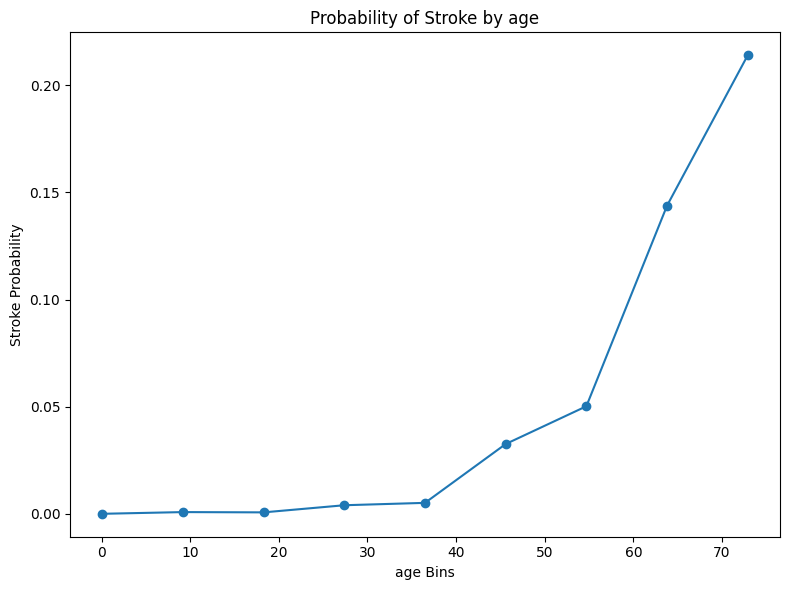

[ 69.42682521  89.47326995 109.73151757 136.39315436 160.92660377
 187.1975     207.47333333 229.30432432 252.60466667]


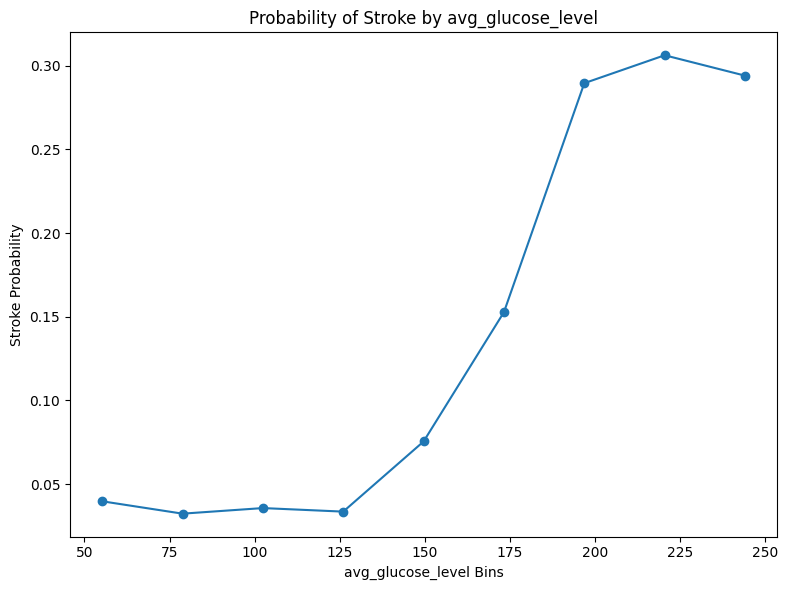

[16.60848485 22.59387788 29.32179087 36.6082637  43.83353414 52.6
 59.76428571 65.38666667 76.22222222]


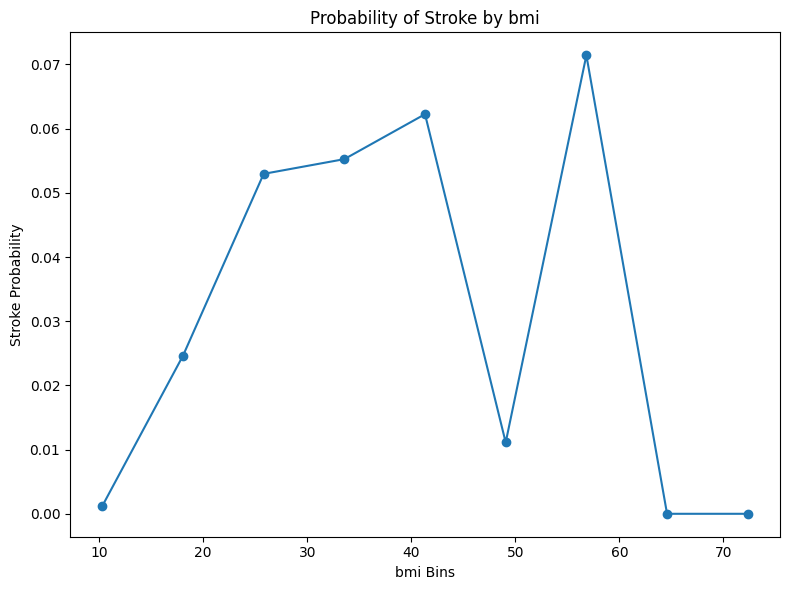

In [9]:
def prob_bins(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()

    for col in num_cols:
        # Define bin edges with increased bins (e.g., 10 bins)
        bin_edges = np.linspace(df[col].min(), df[col].max(), 10)
        means = []
        for i in range(len(bin_edges) - 1):
            bin_mean = df[(df[col] >= bin_edges[i]) & (df[col] < bin_edges[i + 1])][col]
            if not bin_mean.empty:
                bin_mean = bin_mean.mean()
                means.append(bin_mean)
            else:
                means.append((bin_edges[i] + bin_edges[i + 1])/2)
        means = np.array(means)

        # Categorize data into bins
        df['bins'] = pd.cut(df[col], bins=bin_edges, labels=False, include_lowest=True)

        # Calculate stroke probability within bins
        stroke_prob = df.groupby('bins')['stroke'].apply(lambda x: (x == 'yes').sum() / len(x))

        # Plot probabilities as a curve
        print(means[stroke_prob.index.tolist()])
        means = means[stroke_prob.index.tolist()]
        edgs = bin_edges[stroke_prob.index.tolist()]
        means = edgs

        plt.figure(figsize=(8, 6))
        plt.plot(means, stroke_prob.values, marker='o', linestyle='-')  # Use plot instead of bar
        plt.title(f'Probability of Stroke by {col}')
        plt.xlabel(f'{col} Bins')
        plt.ylabel('Stroke Probability')
        # plt.xticks(means, rotation=45, ha='right')  # Set x-axis ticks to bin indices
        plt.tight_layout()
        plt.show()

        df = df.drop('bins', axis=1)  # Remove temporary 'bins' column

prob_bins(df.copy())

<ipython-input-10-14b73f57ce5e>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[target_col].replace({'yes': 1, 'no': 0}, inplace=True)
<ipython-input-10-14b73f57ce5e>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[target_col].replace({'yes': 1, 'no': 0}, inplace=True)


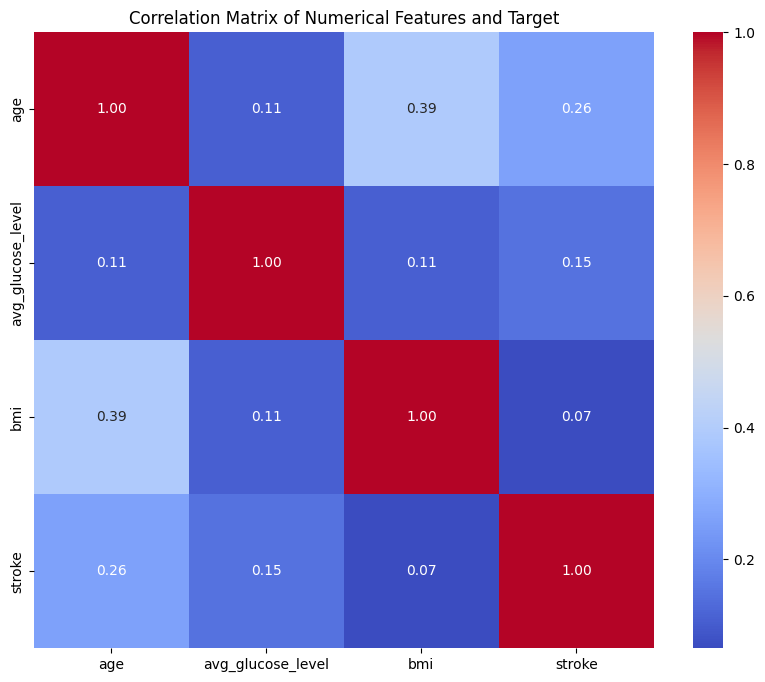

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix(df):
    # Assuming 'df' is your DataFrame and 'target_col' is the target column name
    target_col = "stroke"

    # Select numerical features and target column
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    num_cols_and_target = numerical_cols + [target_col] # Combine numerical features with the target
    df[target_col].replace({'yes': 1, 'no': 0}, inplace=True)
    # Calculate the correlation matrix
    corr_matrix = df[num_cols_and_target].corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features and Target')
    plt.show()

corr_matrix(df.copy())

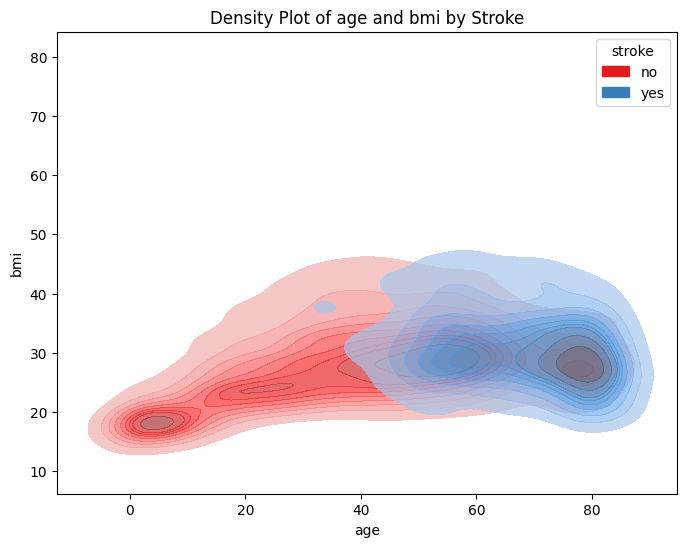

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def density_plot_hue(df, x, y):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=x, y=y, hue='stroke', fill=True, common_norm=False, alpha=0.7, palette='Set1')
    plt.title(f'Density Plot of {x} and {y} by Stroke')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

density_plot_hue(df.copy(), "age", "bmi")

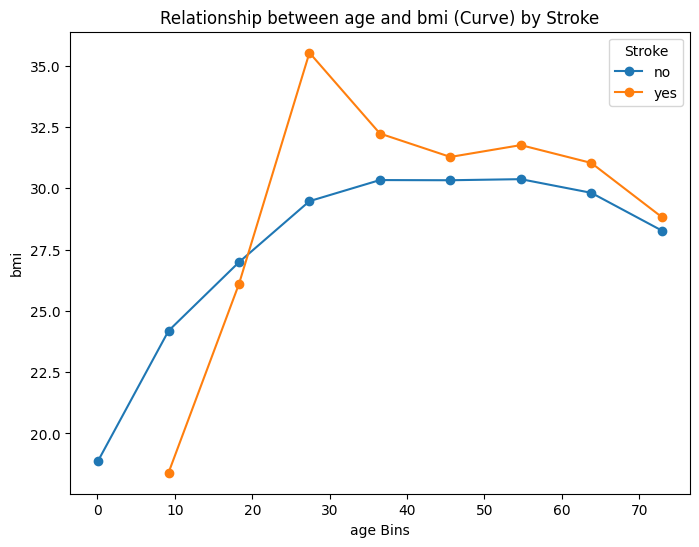

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def curve_plot_hue(df, x, y):
    age_bins = np.linspace(df[x].min(), df[x].max(), 10)
    df['age_bin'] = pd.cut(df[x], bins=age_bins, labels=False, include_lowest=True)

    plt.figure(figsize=(8, 6))
    for stroke_status in df['stroke'].unique():
        subset = df[df['stroke'] == stroke_status]
        mean_bmi_by_age = subset.groupby('age_bin')[y].mean()
        edgs = age_bins[mean_bmi_by_age.index.tolist()]
        plt.plot(edgs, mean_bmi_by_age.values, marker='o', linestyle='-', label=stroke_status)

    plt.title(f'Relationship between {x} and {y} (Curve) by Stroke')
    plt.xlabel(x + ' Bins')
    plt.ylabel(y)
    plt.legend(title='Stroke')
    plt.show()

curve_plot_hue(df.copy(), "age", "bmi")

# Cat EDA

## Count

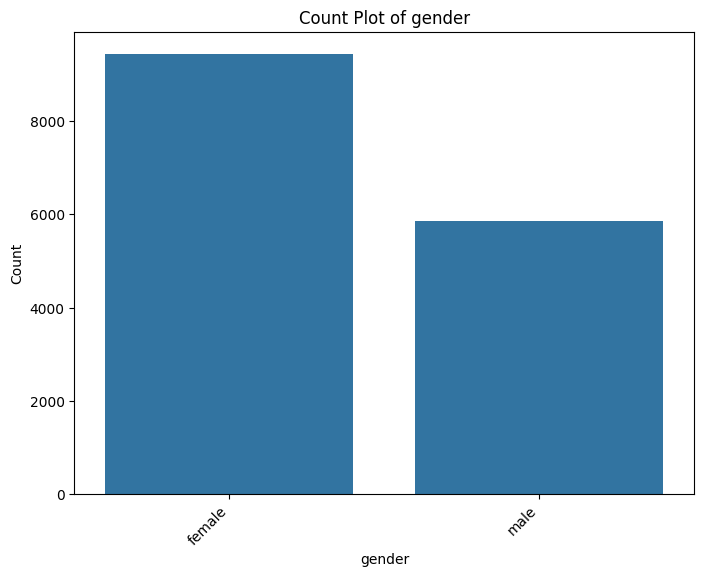

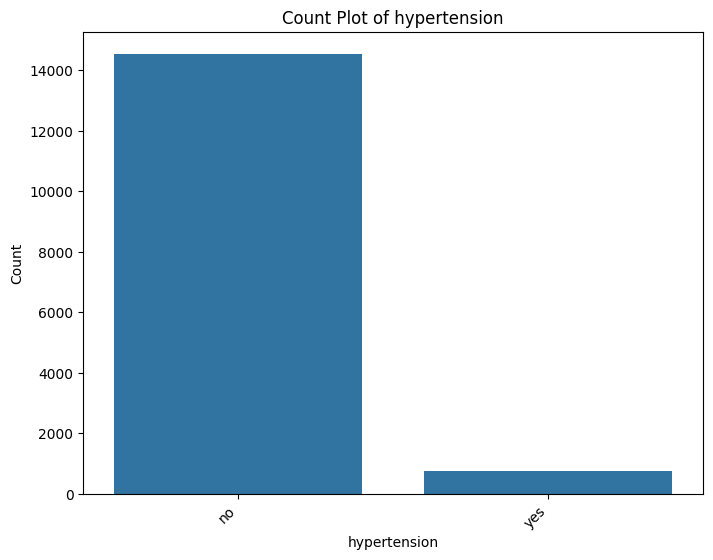

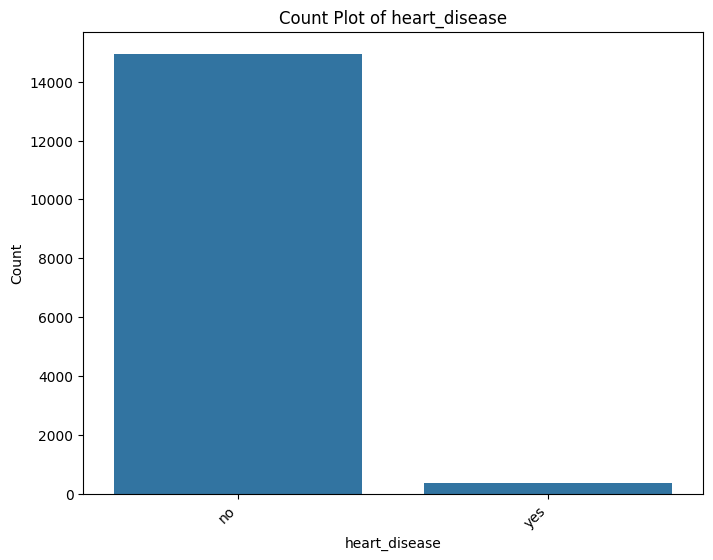

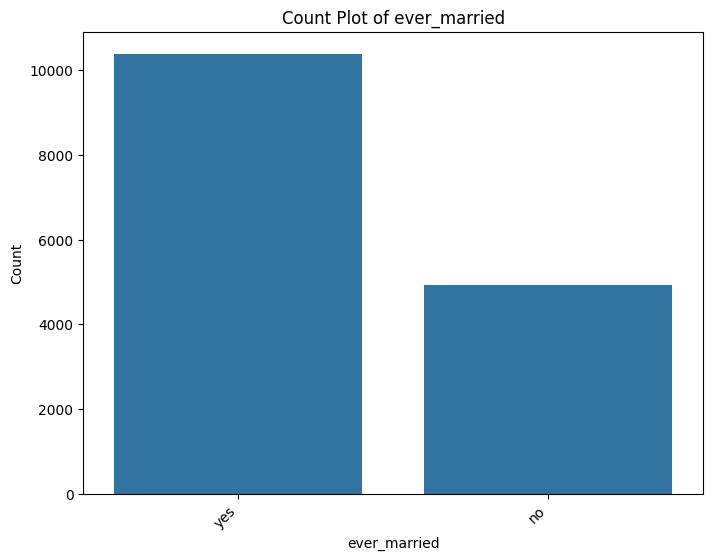

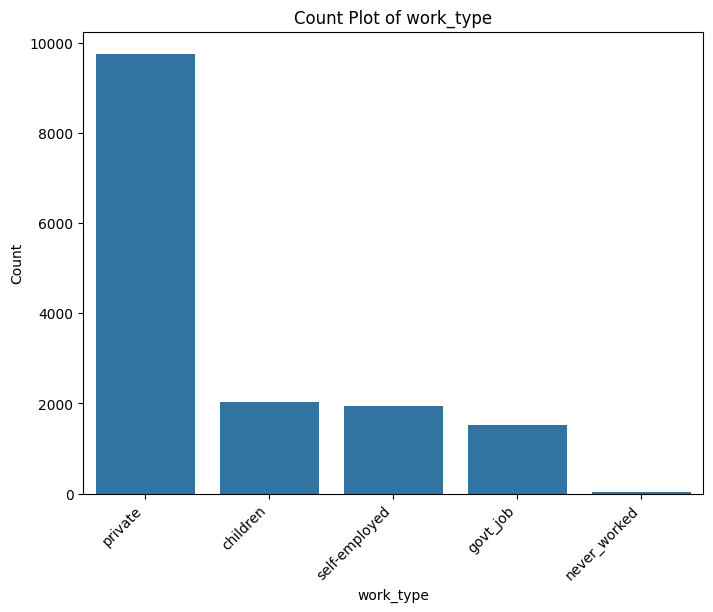

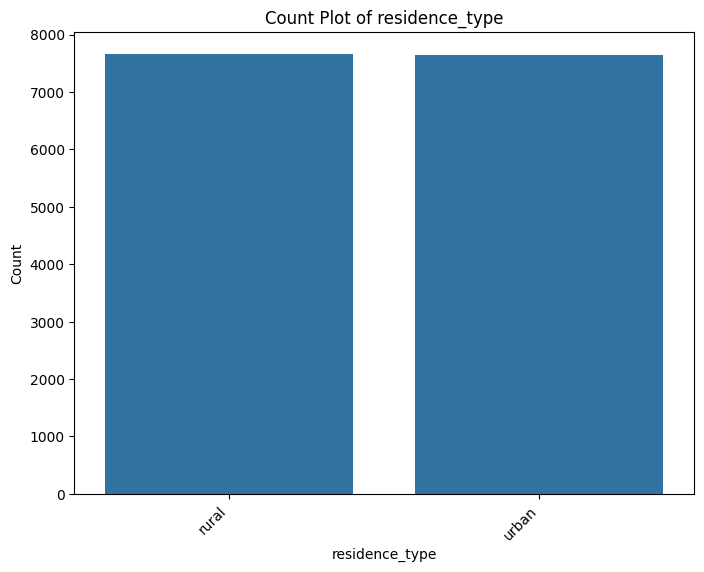

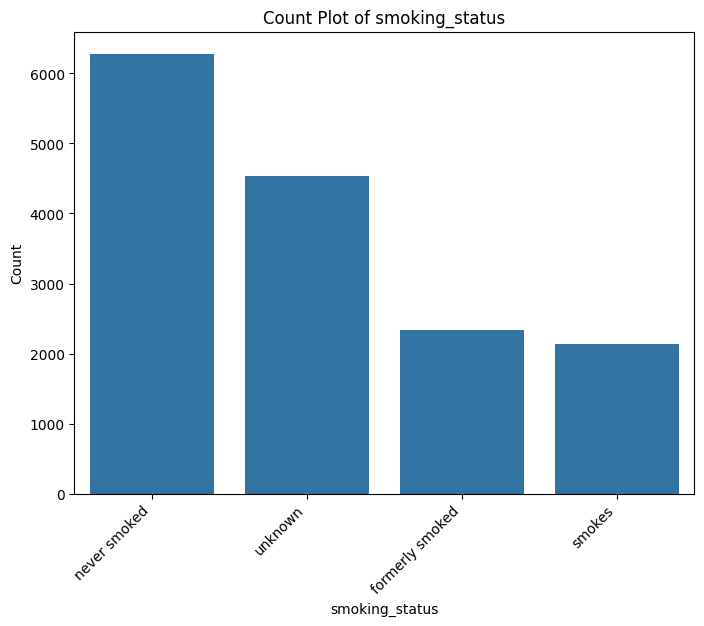

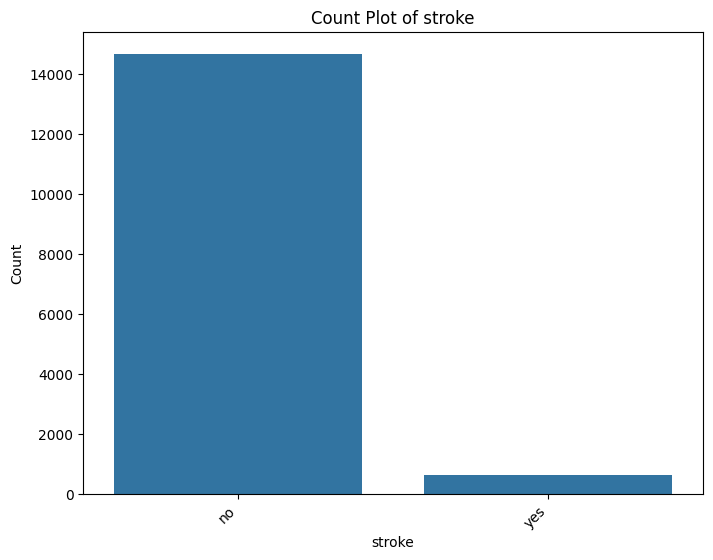

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def count_plot(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    for col in categorical_cols:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show()

count_plot(df.copy())

## Chi impact

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def chi_square_corr(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    chi2_results = {}

    for col in categorical_cols:
        # Create contingency table
        contingency_table = pd.crosstab(df[col], df['stroke'])

        # Perform Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Store results
        chi2_results[col] = {
            'chi2': chi2,
            'p-value': p,
            'dof': dof
        }

    return chi2_results

# Example usage
chi2_results = chi_square_corr(df.copy())

# Sort columns by Chi-squared value (descending order)
sorted_cols = sorted(chi2_results, key=lambda col: chi2_results[col]['chi2'], reverse=True)

# Print columns and their Chi-squared values
print("Columns and their Chi-squared values (impact):")
for col in sorted_cols:
    print(f"{col}: {chi2_results[col]['chi2']:.2f}")

Columns and their Chi-squared values (impact):
stroke: 15277.75
hypertension: 322.35
ever_married: 197.65
heart_disease: 186.61
work_type: 167.11
smoking_status: 81.91
gender: 3.26
residence_type: 0.00


## Prob

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


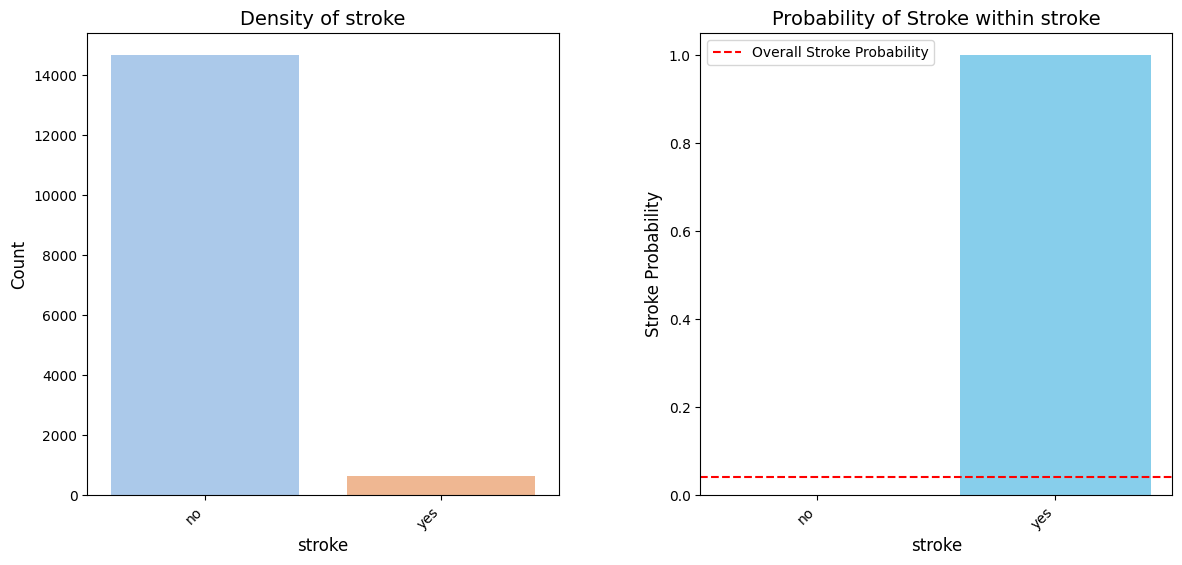

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


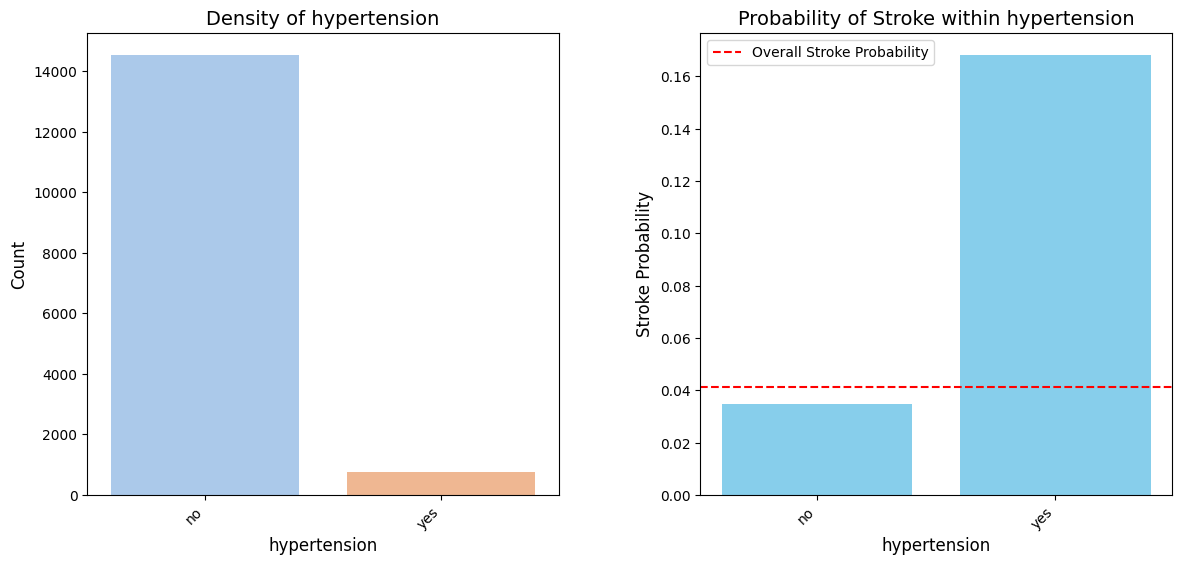

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


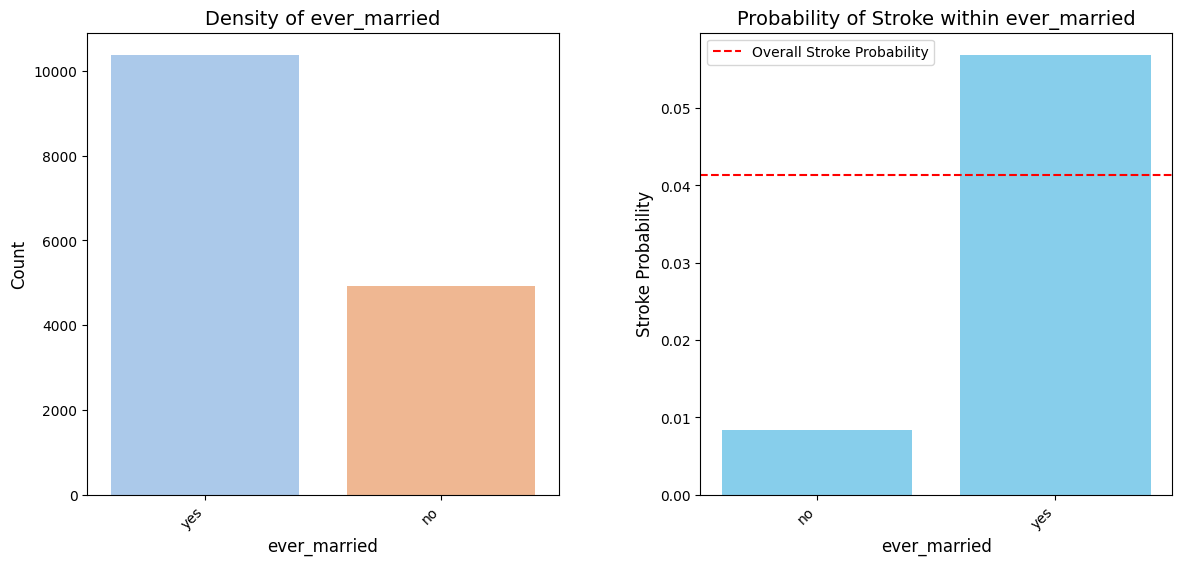

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


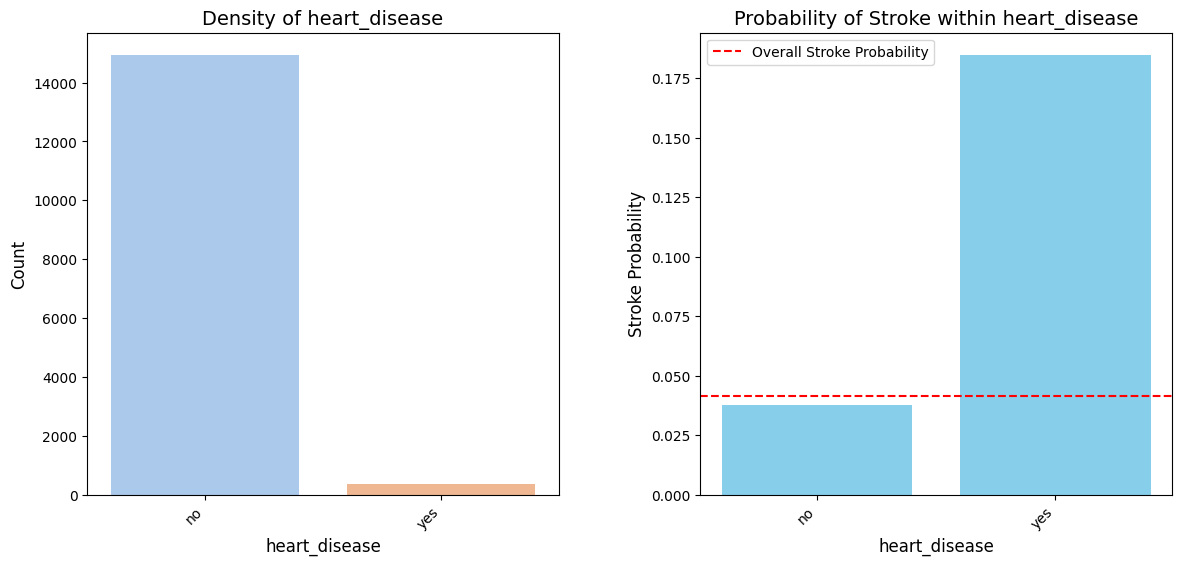

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


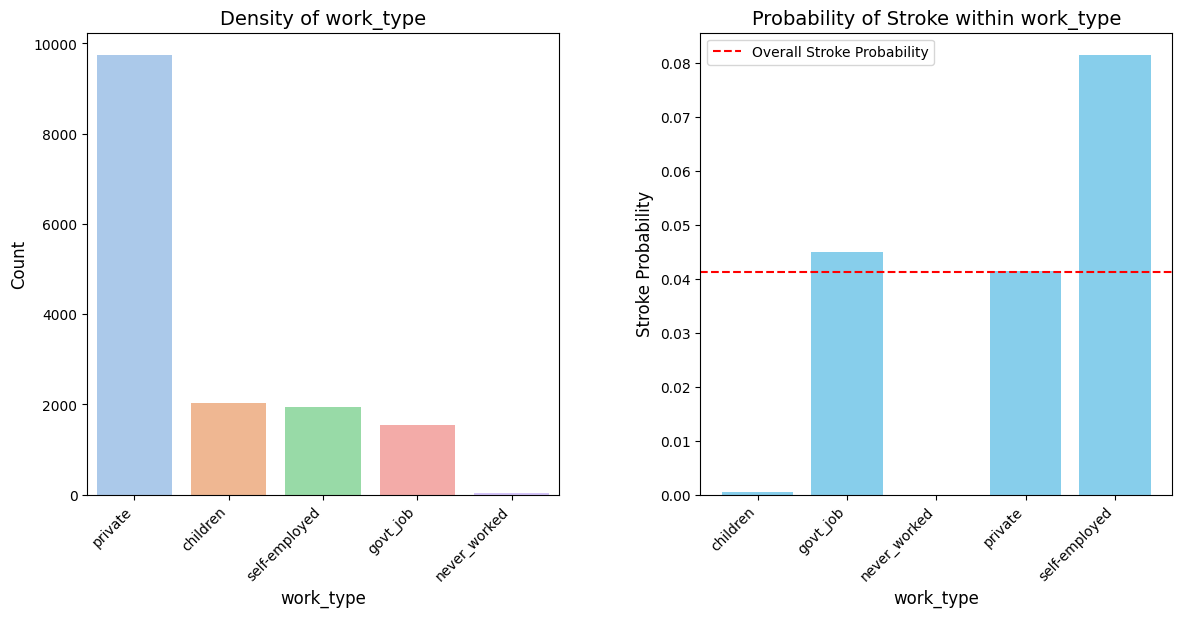

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


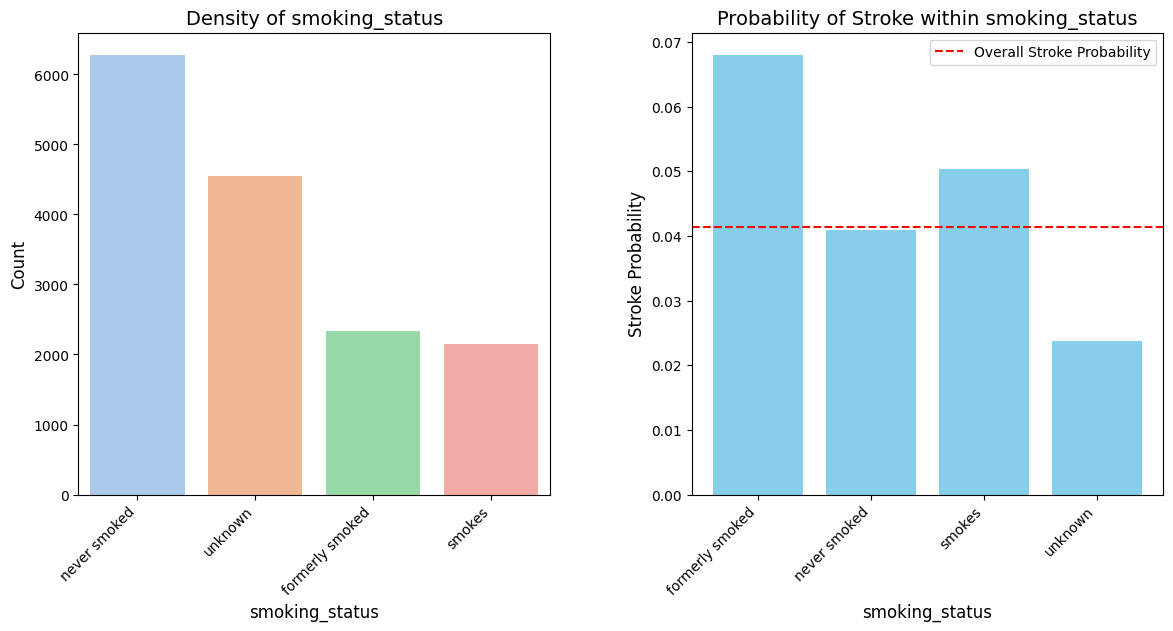

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


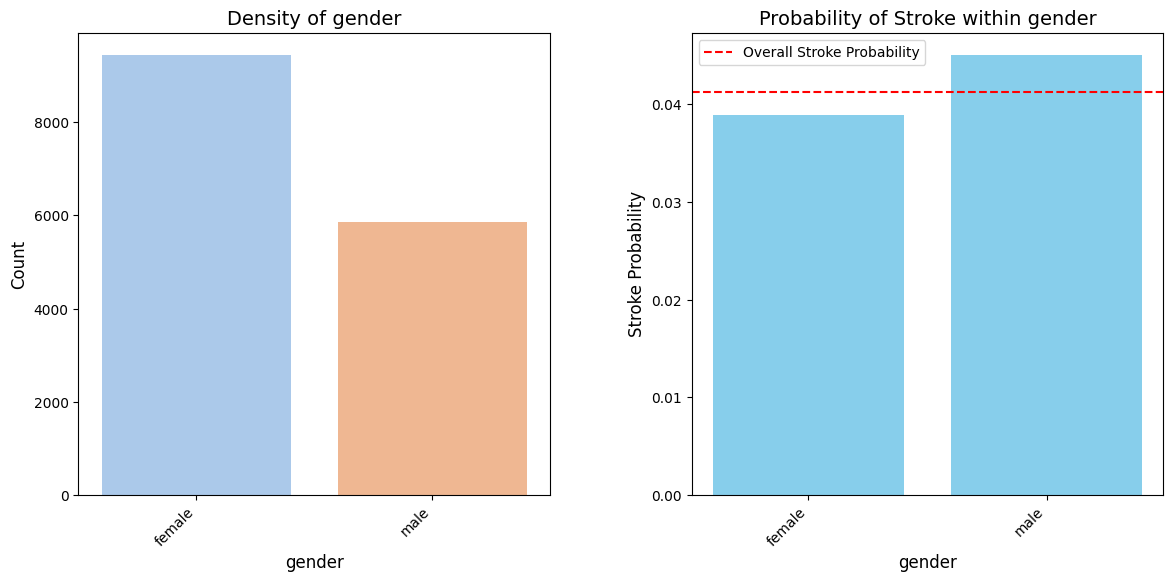

<ipython-input-15-0aafc52948d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
<ipython-input-15-0aafc52948d1>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


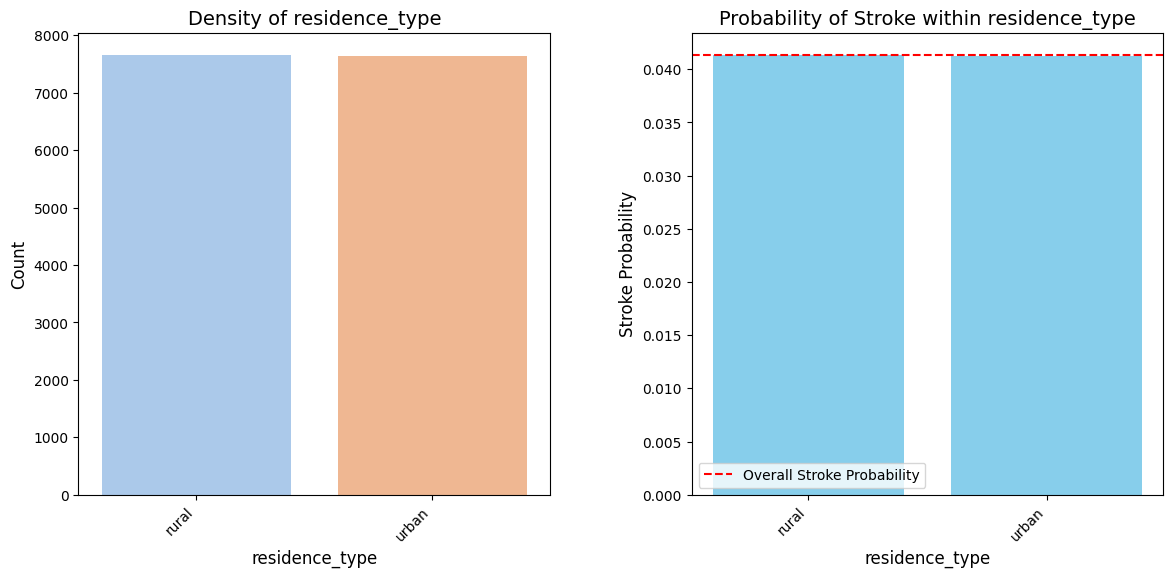

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def cat_density_and_prob_plot(df, cat_cols):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if(cat_cols is not None):
        categorical_cols = cat_cols
    # Calculate overall stroke probability
    overall_stroke_prob = (df['stroke'] == 'yes').sum() / len(df)  # Calculate overall stroke probability

    for col in categorical_cols:
        # Calculate stroke probability for each category value
        stroke_probs = df.groupby(col)['stroke'].apply(lambda x: (x == 'yes').sum() / len(x))

        # Create subplots with adjusted spacing
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'wspace': 0.3})

        # Density plot with styling (unchanged)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette="pastel")
        axes[0].set_title(f'Density of {col}', fontsize=14)
        axes[0].set_xlabel(col, fontsize=12)
        axes[0].set_ylabel('Count', fontsize=12)
        plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10)

        # Probability plot with styling and baseline
        axes[1].bar(stroke_probs.index, stroke_probs.values, color="skyblue")
        axes[1].axhline(y=overall_stroke_prob, color='red', linestyle='--', label='Overall Stroke Probability')  # Add baseline
        axes[1].set_title(f'Probability of Stroke within {col}', fontsize=14)
        axes[1].set_xlabel(col, fontsize=12)
        axes[1].set_ylabel('Stroke Probability', fontsize=12)
        plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=10)
        axes[1].legend()  # Show legend for baseline

        plt.tight_layout()
        plt.show()

cat_density_and_prob_plot(df.copy(), sorted_cols)

## Relationship of features

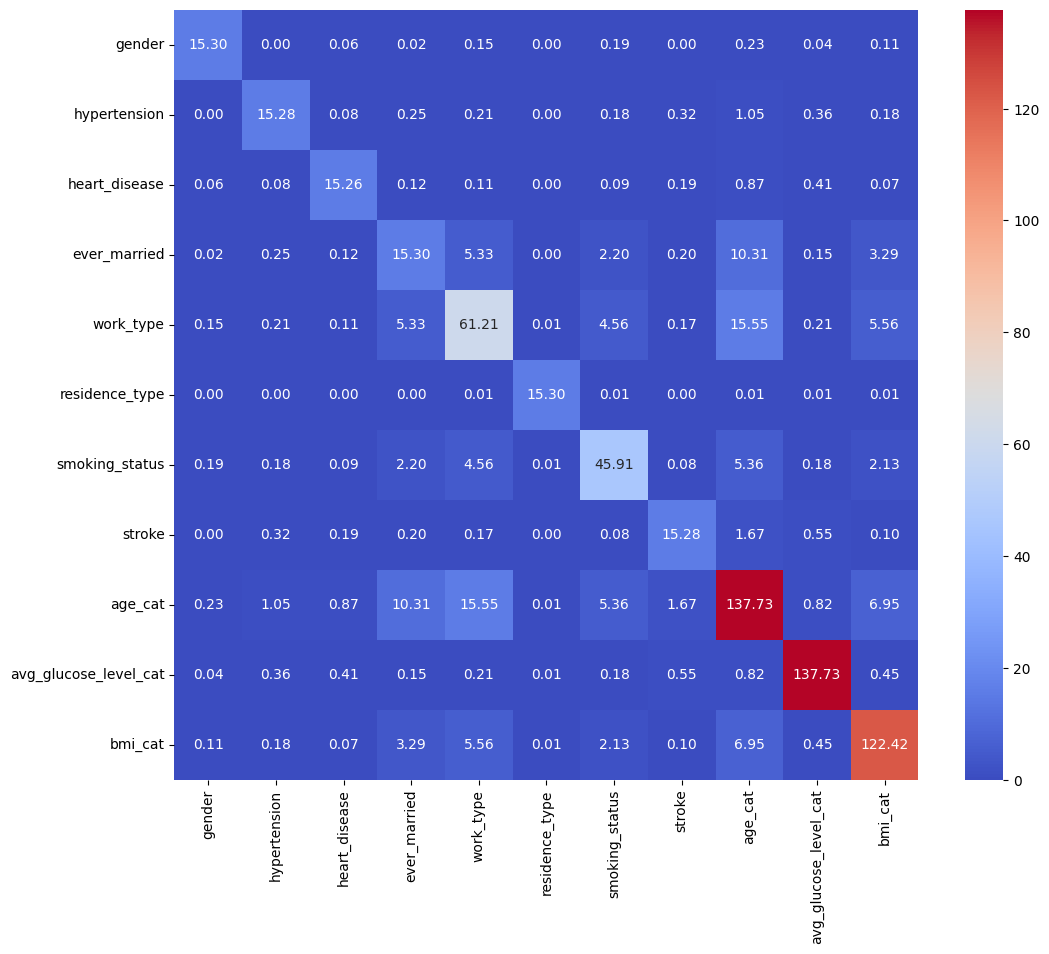

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def chi_corr_all_cols(df, target_col='stroke', bins=10):
    """
    Computes Chi-squared correlation matrix for all columns.

    Args:
        df (pd.DataFrame): Input DataFrame.
        target_col (str): Name of the target column.
        bins (int): Number of bins for categorizing numerical columns.

    Returns:
        pd.DataFrame: Chi-squared correlation matrix.
    """

    # 1. Categorize numerical columns (if any)
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    for col in num_cols:
        df[col + '_cat'] = pd.cut(df[col], bins=bins, labels=False)

    # 2. Get all categorical columns (including categorized numerical)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_cols = cat_cols + [col + '_cat' for col in num_cols]

    # 3. Create contingency tables and compute Chi-squared values
    chi2_results = {}
    for col1 in cat_cols:
        chi2_results[col1] = {}
        for col2 in cat_cols + [target_col]:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            chi2_results[col1][col2] = chi2

    # 4. Create Chi-squared correlation matrix
    chi2_corr_matrix = pd.DataFrame(chi2_results) / 1000

    return chi2_corr_matrix

# Example usage:
chi2_corr_matrix = chi_corr_all_cols(df.copy())

# Print or visualize the correlation matrix:
# print(chi2_corr_matrix)
# or
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

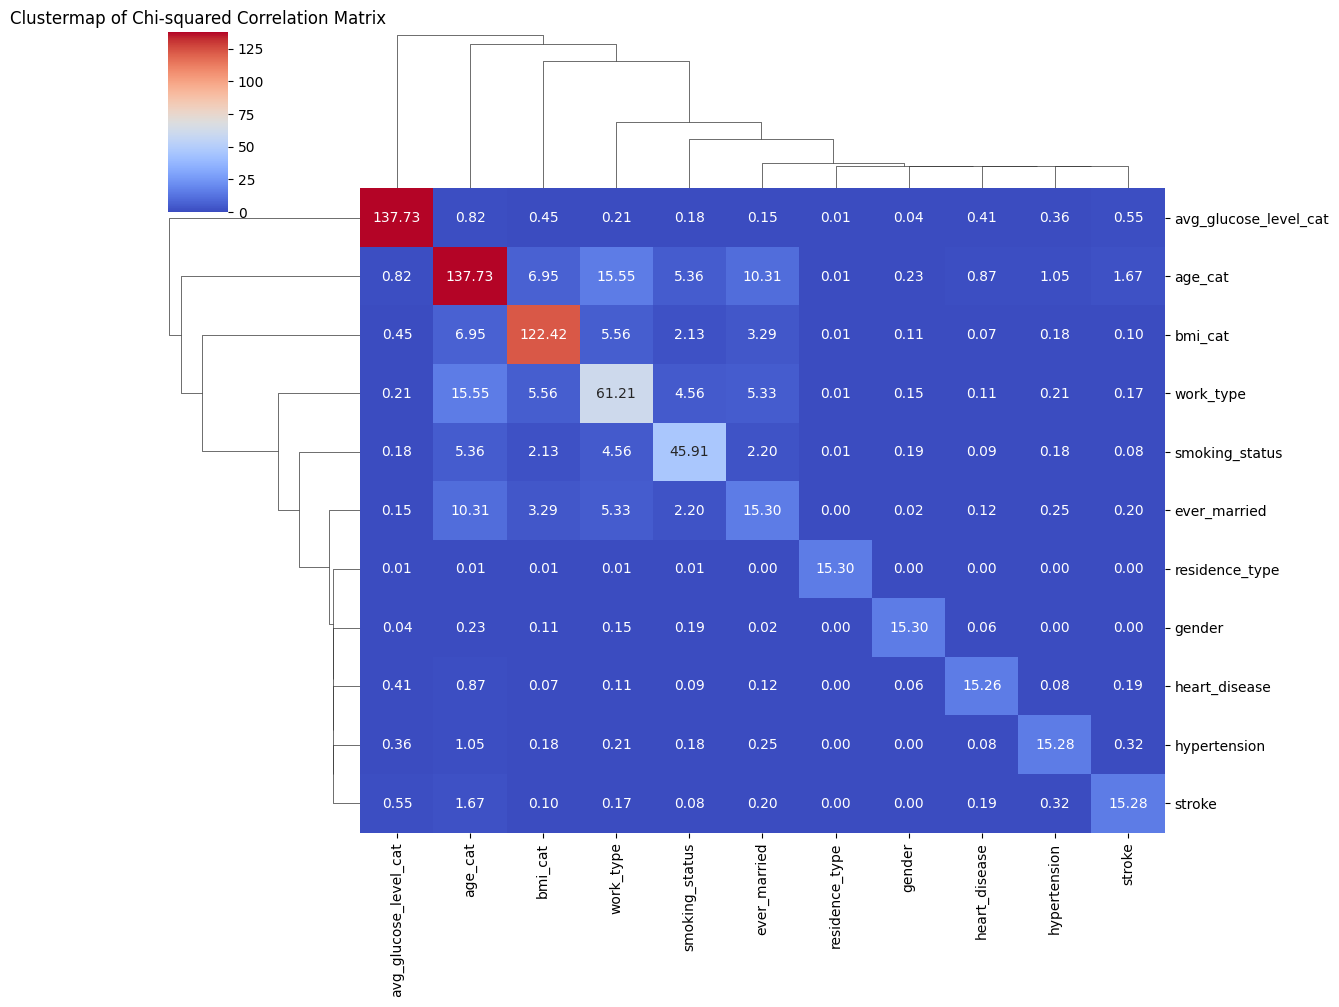

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming chi2_corr_matrix is already calculated

# Create the clustermap
sns.clustermap(chi2_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", figsize=(12, 10))
plt.title('Clustermap of Chi-squared Correlation Matrix')
plt.show()

<ipython-input-18-0494e70bf09e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  married_proportion = df.groupby('age_group')['ever_married'].apply(lambda x: (x == 'yes').sum() / len(x))
<ipython-input-18-0494e70bf09e>:14: RuntimeWarning: invalid value encountered in scalar divide
  married_proportion = df.groupby('age_group')['ever_married'].apply(lambda x: (x == 'yes').sum() / len(x))


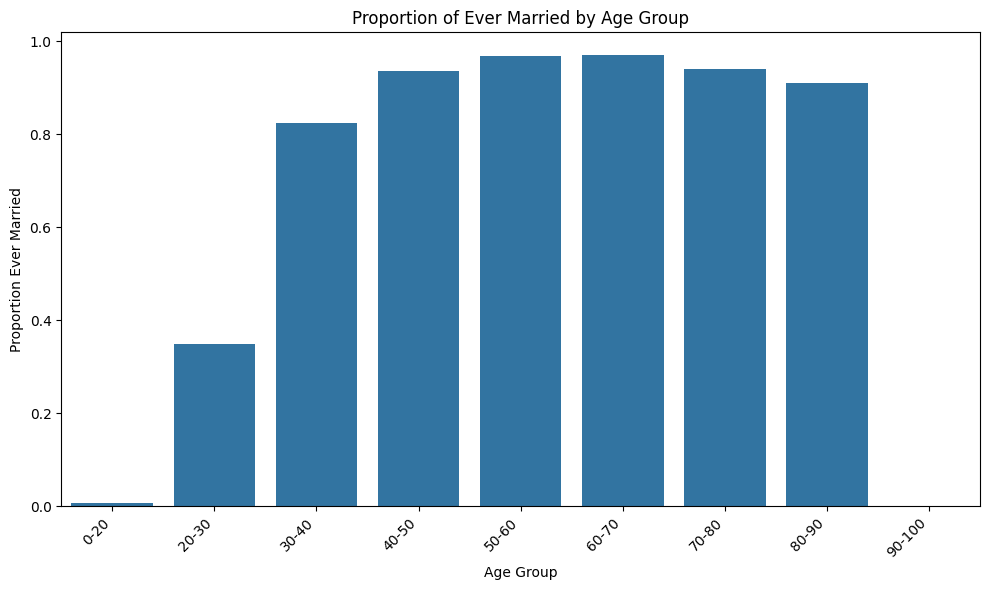

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def married_by_age(df):
    # Assuming 'df' is your DataFrame

    # Create age groups (bins)
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust as needed
    age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # Calculate proportion of ever_married within each age group
    married_proportion = df.groupby('age_group')['ever_married'].apply(lambda x: (x == 'yes').sum() / len(x))

    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=married_proportion.index, y=married_proportion.values)
    plt.title('Proportion of Ever Married by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Proportion Ever Married')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

married_by_age(df.copy())

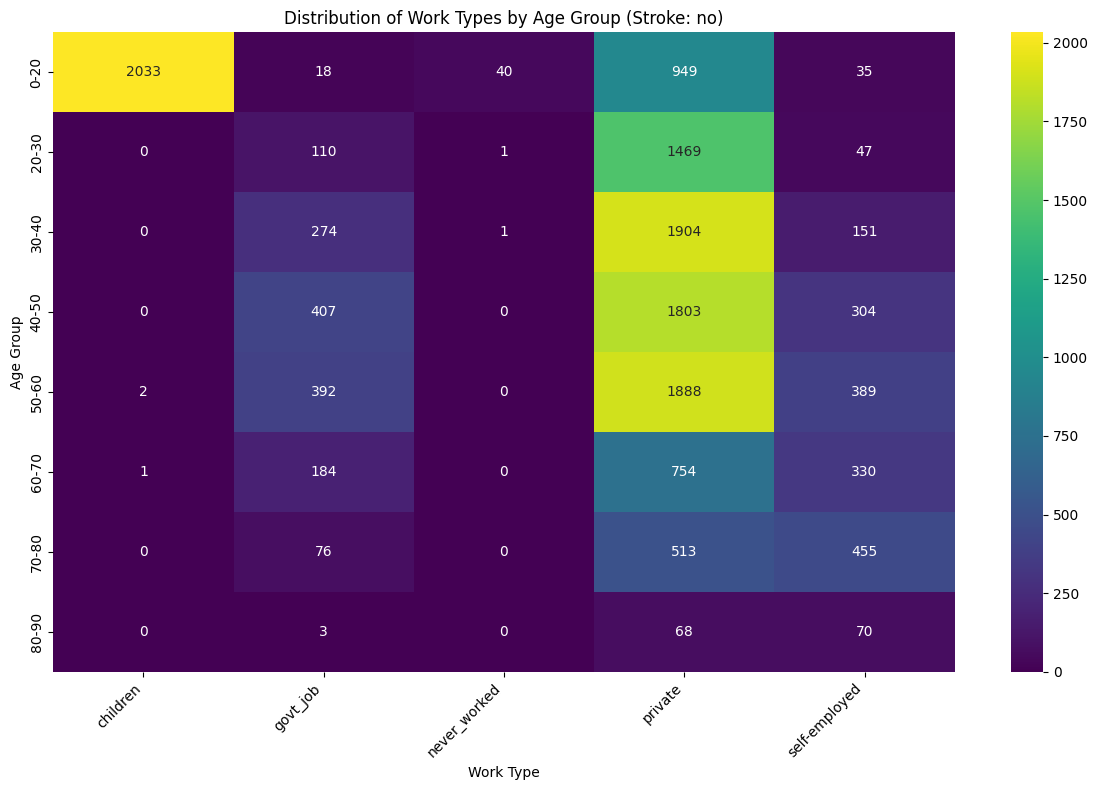

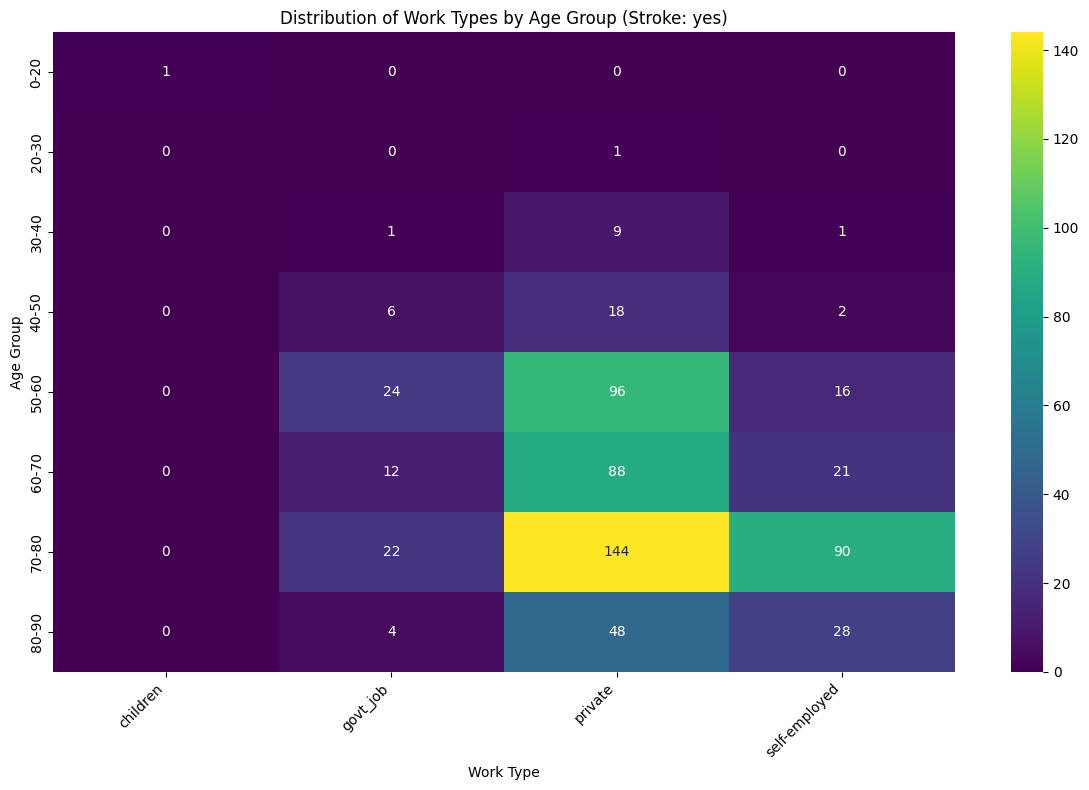

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def work_type_by_age_hue(df):
    # Assuming 'df' is your DataFrame

    # Create age groups (bins)
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust as needed
    age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # Create separate heatmaps for each stroke status
    for stroke_status in df['stroke'].unique():
        subset = df[df['stroke'] == stroke_status]
        work_type_by_age = pd.crosstab(subset['age_group'], subset['work_type'])

        plt.figure(figsize=(12, 8))
        sns.heatmap(work_type_by_age, annot=True, cmap='viridis', fmt='d')
        plt.title(f'Distribution of Work Types by Age Group (Stroke: {stroke_status})')
        plt.xlabel('Work Type')
        plt.ylabel('Age Group')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

work_type_by_age_hue(df.copy())

<ipython-input-20-de5ee1f7654d>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_type_by_age = df.groupby(['age_group', 'work_type'])['stroke'].apply(lambda x: (x == 'yes').sum() / len(x)).reset_index()


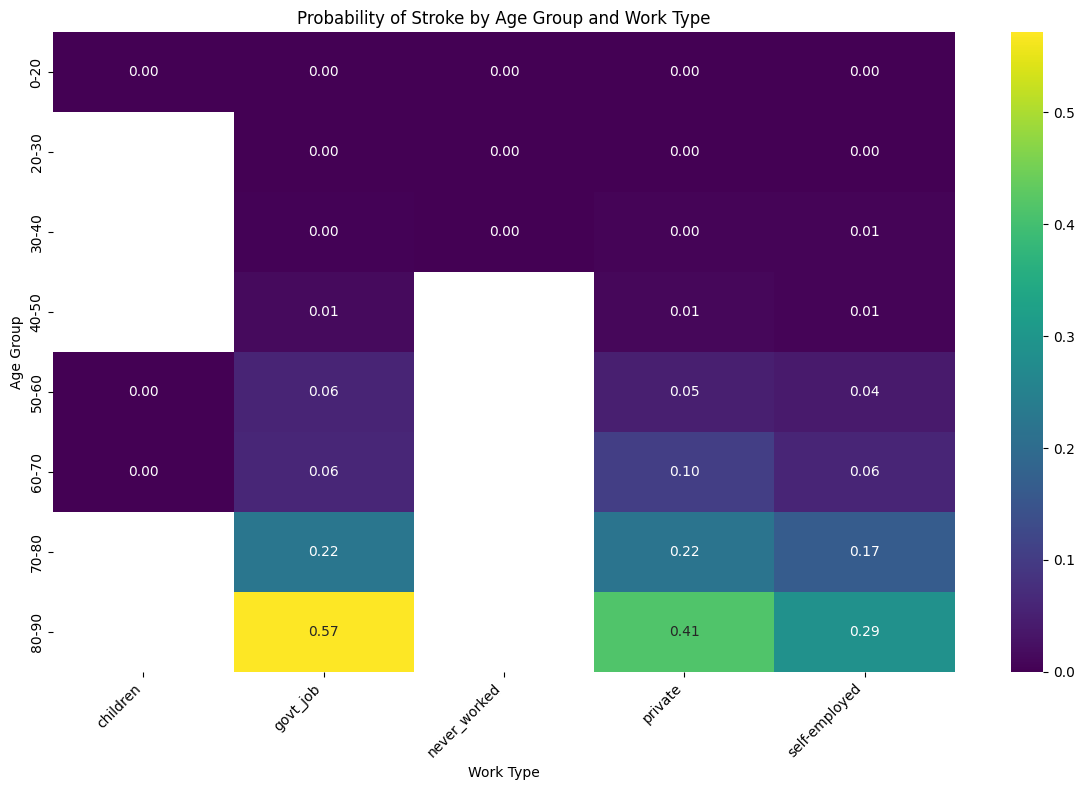

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def work_type_by_age_prob(df):
    # Create age groups
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # Calculate stroke probability for each cell
    work_type_by_age = df.groupby(['age_group', 'work_type'])['stroke'].apply(lambda x: (x == 'yes').sum() / len(x)).reset_index()
    work_type_by_age = work_type_by_age.pivot(index='age_group', columns='work_type', values='stroke')

    # Create heatmap with probability values
    plt.figure(figsize=(12, 8))
    sns.heatmap(work_type_by_age, annot=True, cmap='viridis', fmt=".2f")  # fmt=".2f" for probabilities
    plt.title('Probability of Stroke by Age Group and Work Type')
    plt.xlabel('Work Type')
    plt.ylabel('Age Group')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

work_type_by_age_prob(df.copy())

       work_type    stroke
4  self-employed  0.081485
1       govt_job  0.045010
3        private  0.041427
0       children  0.000491
2   never_worked  0.000000


<ipython-input-21-435ee8bf45bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=work_stroke, x='work_type', y='stroke', palette='viridis')


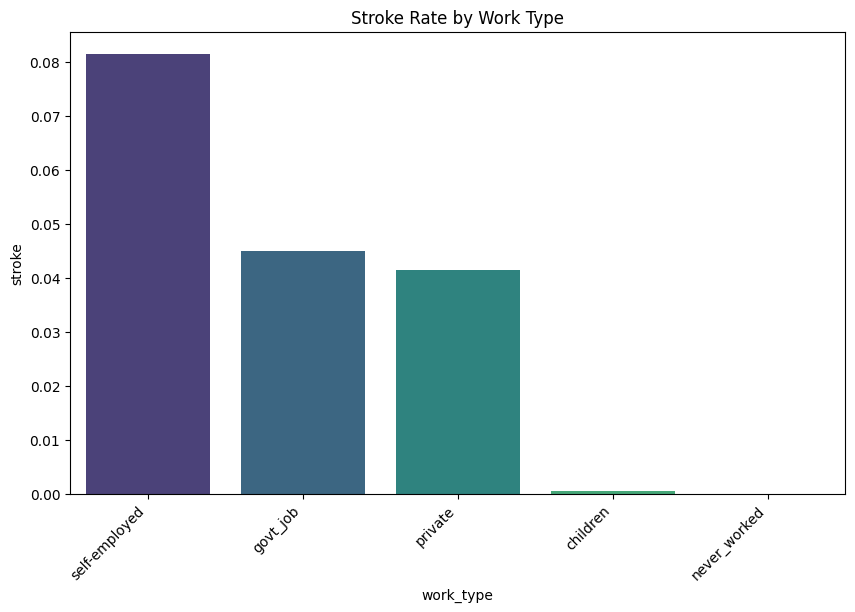

In [21]:
def stroke_rate_by_work_type(df):
    # Grouped analysis: Calculate stroke rate by work type
    if 'stroke' in df.columns:
        # Convert 'stroke' column to numerical (0 and 1) before calculating mean
        df['stroke'] = df['stroke'].map({'yes': 1, 'no': 0})

        work_stroke = df.groupby('work_type')['stroke'].mean().reset_index()
        work_stroke = work_stroke.sort_values(by='stroke', ascending=False)
        print(work_stroke)

        # Bar plot of stroke rates by work type
        plt.figure(figsize=(10, 6))
        # Pass the DataFrame 'work_stroke' to the 'data' argument
        sns.barplot(data=work_stroke, x='work_type', y='stroke', palette='viridis')
        plt.title('Stroke Rate by Work Type') # Added a title to the plot
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show() # Display the plot

stroke_rate_by_work_type(df.copy())

<ipython-input-22-ccfc22776826>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_type_given_stroke_probs = df.groupby(['age_group', 'stroke'])['work_type'].value_counts(normalize=True).reset_index(name='p_work_type_given_stroke')
<ipython-input-22-ccfc22776826>:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  work_type_given_stroke_pivot = work_type_given_stroke_probs.pivot_table(index='age_group', columns=['stroke', 'work_type'], values='p_work_type_given_stroke', fill_value=0)
<ipython-input-22-ccfc22776826>:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas.

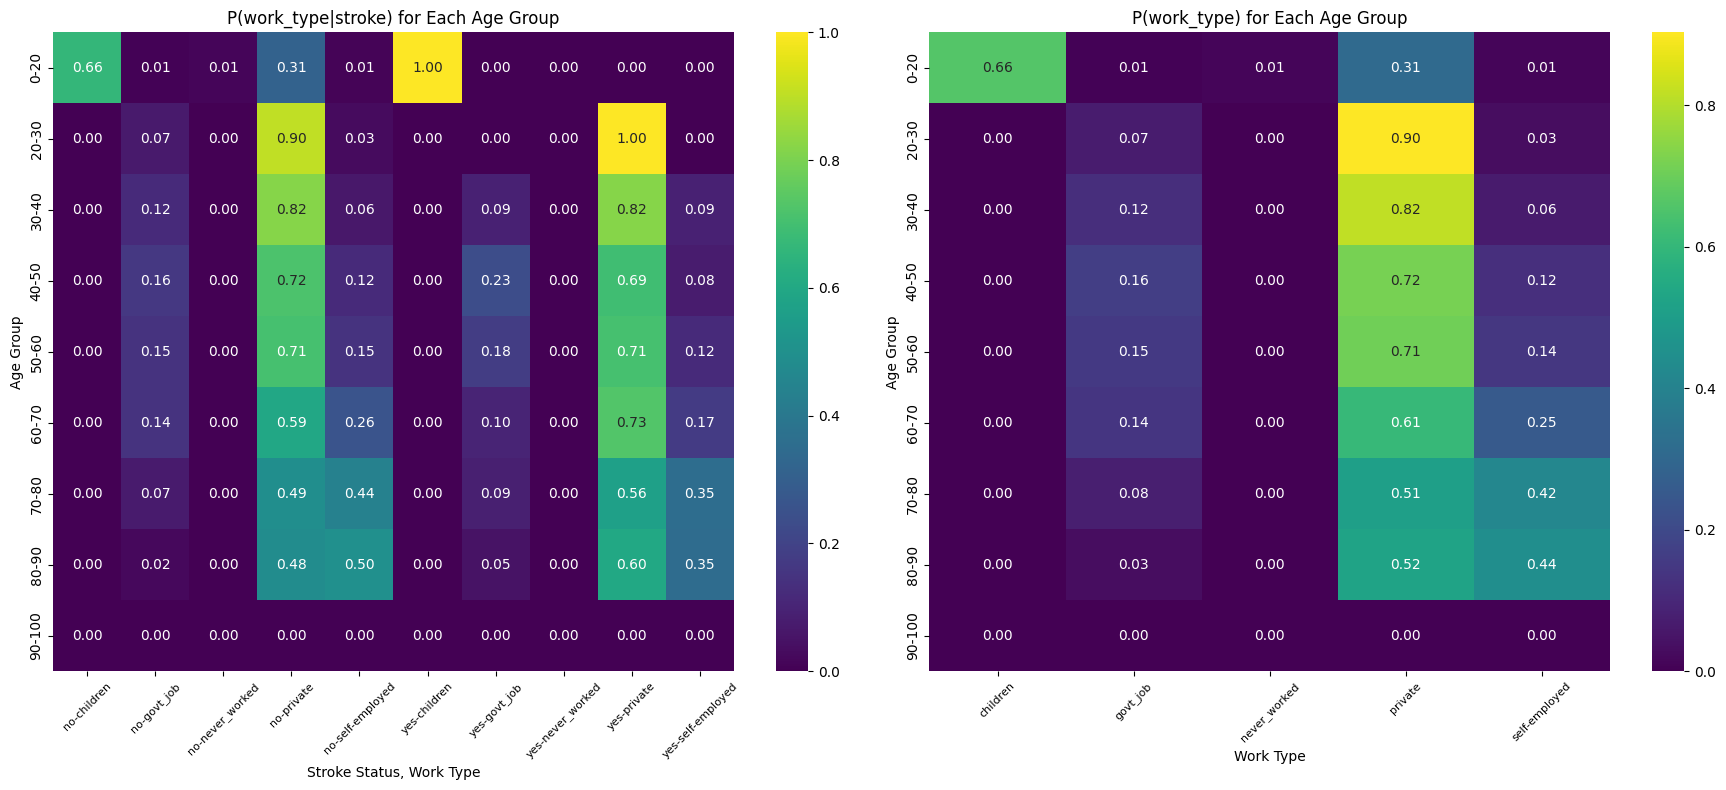

<Figure size 2000x1800 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def work_type_probs_by_age_heatmap(df):
    """
    Computes P(work_type|stroke) and P(work_type) for each age group and plots heatmaps.

    Args:
        df (pd.DataFrame): Input DataFrame.
    """

    # 1. Create age groups (bins)
    age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust as needed
    age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

    # 2. Calculate P(work_type|stroke)
    work_type_given_stroke_probs = df.groupby(['age_group', 'stroke'])['work_type'].value_counts(normalize=True).reset_index(name='p_work_type_given_stroke')
    work_type_given_stroke_pivot = work_type_given_stroke_probs.pivot_table(index='age_group', columns=['stroke', 'work_type'], values='p_work_type_given_stroke', fill_value=0)

    # 3. Calculate P(work_type)
    work_type_probs = df.groupby(['age_group'])['work_type'].value_counts(normalize=True).reset_index(name='p_work_type')
    work_type_probs_pivot = work_type_probs.pivot_table(index='age_group', columns='work_type', values='p_work_type', fill_value=0)

    # 4. Plot heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns for subplots

    # Heatmap for P(work_type|stroke)

    sns.heatmap(work_type_given_stroke_pivot, annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
    axes[0].set_title('P(work_type|stroke) for Each Age Group')
    axes[0].set_xlabel('Stroke Status, Work Type')
    axes[0].set_ylabel('Age Group')
    axes[0].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

    # Heatmap for P(work_type)
    sns.heatmap(work_type_probs_pivot, annot=True, cmap='viridis', fmt=".2f", ax=axes[1])
    axes[1].set_title('P(work_type) for Each Age Group')
    axes[1].set_xlabel('Work Type')
    axes[1].set_ylabel('Age Group')
    axes[1].tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.figure(figsize=(20, 18))
    plt.show()

# Example usage:
work_type_probs_by_age_heatmap(df.copy())

In [23]:
import pandas as pd

def gender_given_stroke_prob(df):
    """
    Computes P(gender|stroke) for both stroke='yes' and stroke='no'.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame containing P(gender|stroke) for each combination of gender and stroke.
    """

    # 1. Group by stroke and calculate probabilities for gender
    gender_probs = df.groupby('stroke')['gender'].value_counts(normalize=True).reset_index(name='probability')

    # 2. Reshape the DataFrame for better readability (optional)
    gender_probs_pivot = gender_probs.pivot_table(index='stroke', columns='gender', values='probability', fill_value=0)

    return gender_probs_pivot

def gender_prob(df):
    """
    Computes P(gender) for both genders.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.Series: Series containing P(gender) for each gender.
    """

    # Calculate probabilities for gender
    gender_probs = df['gender'].value_counts(normalize=True)

    return gender_probs

# Example usage:
probabilities_series = gender_prob(df.copy())
print(probabilities_series)

# Example usage:
probabilities_df = gender_given_stroke_prob(df.copy())
print(probabilities_df)

gender
female    0.617265
male      0.382735
Name: proportion, dtype: float64
gender    female      male
stroke                    
no      0.618772  0.381228
yes     0.582278  0.417722


# Split data

In [42]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_col' is the target column name
target_col = "stroke"
X = df.drop(columns=[target_col])
y = df[target_col]
y = y.replace({'yes': 1, 'no': 0})

# Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  object 
 1   hypertension       12242 non-null  object 
 2   heart_disease      12242 non-null  object 
 3   ever_married       12242 non-null  object 
 4   work_type          12242 non-null  object 
 5   residence_type     12242 non-null  object 
 6   smoking_status     12242 non-null  object 
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


<ipython-input-42-39d416b1f2e7>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'yes': 1, 'no': 0})


In [43]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

def get_processor(X_train):
    # Define categorical and numerical features
    # Initial feature identification
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
    # print(categorical_features)
    # print(numerical_features)

    # Reclassify numerical features with < 10 unique values as categorical
    tmp = numerical_features.copy()
    for feature in numerical_features:
        if X_train[feature].nunique() > 2 and X_train[feature].nunique() < 10:
            print(f"Reclassifying {feature} as categorical based on unique values.")
            categorical_features.append(feature)
            tmp.remove(feature)
    numerical_features = tmp
    print(categorical_features)
    print(numerical_features)

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values with median
        # ('scaler', MinMaxScaler())  # Normalize numerical features
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values with most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor


In [26]:
%%capture
!pip install xgboost
!pip install catboost

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier  # Import RandomForestClassifier

def get_gskf_pipeline(X_train, param_grid={}, scoring='roc_auc'):
    # Create the pipeline with preprocessor and model
    preprocessor = get_processor(X_train)

    # Create XGBRFClassifier, CatBoostClassifier, and RandomForestClassifier instances
    estimators = [
        ('xgb', XGBRFClassifier(tree_method='gpu_hist',  # Use GPU for XGBoost
                            scale_pos_weight=2,
                            random_state=42)),
        ('catboost', CatBoostClassifier(task_type='GPU',  # Use GPU for CatBoost
                            scale_pos_weight=2,
                            verbose=0,
                            random_state=42)),
        ('rf', RandomForestClassifier(
            random_state=42,  # Remove scale_pos_weight
            # You can adjust class_weight instead if needed
            class_weight='balanced'  # or 'balanced_subsample'
        ))  # Add RandomForestClassifier
    ]

    # Create a VotingClassifier with the estimators
    ensemble_classifier = VotingClassifier(estimators=estimators, voting='soft')

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', ensemble_classifier)
    ])

    # Create a GridSearchCV object with StratifiedKFold for cross-validation
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=skfold)

    return grid_search


In [45]:
from imblearn.under_sampling import RandomUnderSampler

scaler = MinMaxScaler()
sampler = RandomUnderSampler(random_state=42)

def get_pass_data(X_train, y_train, is_train=True):
    X, y = X_train.copy(), y_train.copy()
    # Select columns
    X = X.drop(columns=['residence_type', 'ever_married'])

    # Int mapping
    y = y.replace({"yes": 1, "no": 0})

    X = X.replace({"yes": 1, "no": 0})
    X['gender'] = X['gender'].map({
        'male': 0,
        'female': 1,
    }).astype('int')
    if('residence_type' in X.columns):
        X['residence_type'] = X['residence_type'].map({
            'urban': 0,
            'rural': 1,
        }).astype('int')
    X['work_type'] = X['work_type'].map({
        'private': 0,
        'self-employed': 1,
        'govt_job': 2,
        'children': 3,
        'never_worked': 4,
    }).astype('int')
    X['smoking_status'] = X['smoking_status'].map({
        'never smoked': 0,
        'formerly smoked': 1,
        'smokes': 2,
        'unknown': 3,
    }).astype('int')

    # Scaler and sampler
    if(is_train):
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # Define the desired ratio
        # desired_ratio = 5.0
        # n_samples_class_0 = int(desired_ratio * y.value_counts()[1])
        # sampling_strategy = {0: n_samples_class_0, 1: y.value_counts()[1]}
        # global sampler
        # sampler = RandomUnderSampler(sampling_strategy=sampling_strategy,
        #                             random_state=42)
        # X, y = sampler.fit_resample(X, y)
        X.info()
    else:
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # X, y = sampler.fit_resample(X, y)
        pass
    return X, y


In [46]:
X_pass, y_pass = get_pass_data(X_train, y_train)
X_test_pass, y_test_pass = get_pass_data(X_test, y_test, False)
X_pass.shape, y_pass.value_counts(), y_test_pass.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  int64  
 1   hypertension       12242 non-null  int64  
 2   heart_disease      12242 non-null  int64  
 3   work_type          12242 non-null  int64  
 4   smoking_status     12242 non-null  int64  
 5   age                12242 non-null  float64
 6   avg_glucose_level  12242 non-null  float64
 7   bmi                12242 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 860.8 KB


<ipython-input-45-3a9c7592f0d0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})
<ipython-input-45-3a9c7592f0d0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})


((12242, 8),
 stroke
 0    11736
 1      506
 Name: count, dtype: int64,
 stroke
 0    2935
 1     126
 Name: count, dtype: int64)

In [47]:
params = {
    # 'classifier__xgb__learning_rate': [0.01, 0.1],
    # 'classifier__xgb__max_depth': [3, 5, 7],
    # 'classifier__xgb__n_estimators': [200, 300, 1000],
    # 'classifier__xgb__scale_pos_weight': [2, 5, 7, 10],
    # 'classifier__catboost__learning_rate': [0.01, 0.1],
    # 'classifier__catboost__depth': [3, 5, 7],
    # 'classifier__catboost__iterations': [200, 300, 1000],
    # 'classifier__catboost__scale_pos_weight': [2, 5, 7, 10],
}
gskfold = get_gskf_pipeline(X_pass, params)
gskfold.fit(X_pass, y_pass)

best_model = gskfold.best_estimator_
y_pred = best_model.predict(X_test_pass)
y_pred

Reclassifying work_type as categorical based on unique values.
Reclassifying smoking_status as categorical based on unique values.
['work_type', 'smoking_status']
['gender', 'hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'bmi']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:51:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
gskfold.best_params_

{}

In [49]:
# Get feature importances from the trained model
# Access the classifier within the pipeline using named steps
xgb_feature_importances = best_model['classifier'].estimators_[0].feature_importances_
catboost_feature_importances = best_model['classifier'].estimators_[1].feature_importances_
rf_feature_importances = best_model['classifier'].estimators_[2].feature_importances_  # Get RandomForest importances

# Calculate average feature importances from all three models
feature_importances = (xgb_feature_importances + catboost_feature_importances + rf_feature_importances) / 3

# Get feature names after preprocessing
feature_names = best_model['preprocessor'].get_feature_names_out()

# Create a DataFrame to store feature importances and names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                   Feature  Importance
3                 num__age   14.355363
5                 num__bmi    8.003480
4   num__avg_glucose_level    6.115496
9         cat__work_type_3    2.536743
0              num__gender    0.550816
11   cat__smoking_status_0    0.409734
7         cat__work_type_1    0.351339
13   cat__smoking_status_2    0.350051
12   cat__smoking_status_1    0.319228
1        num__hypertension    0.283329
14   cat__smoking_status_3    0.255740
6         cat__work_type_0    0.246082
2       num__heart_disease    0.114717
8         cat__work_type_2    0.093297
10        cat__work_type_4    0.014584


              precision    recall  f1-score   support

           0     0.9649    0.9925    0.9785      2935
           1     0.4762    0.1587    0.2381       126

    accuracy                         0.9582      3061
   macro avg     0.7205    0.5756    0.6083      3061
weighted avg     0.9448    0.9582    0.9480      3061

ROC AUC: 0.8945


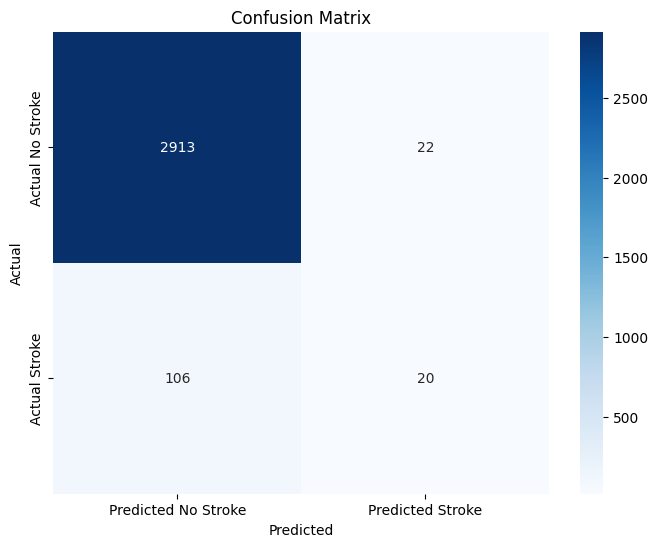

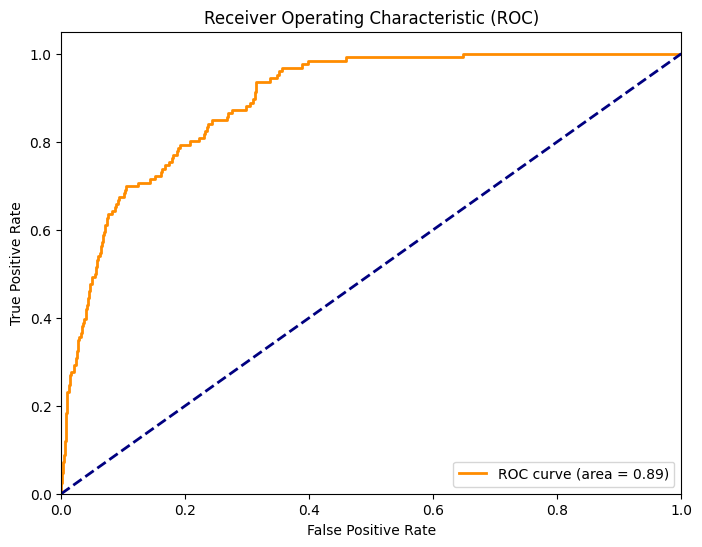

In [50]:
from sklearn.metrics import (precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            classification_report,
                            roc_curve)

# Make predictions on the test set
# y_pred
# Calculate evaluation metrics
# precision = precision_score(y_test_pass, y_pred)
# recall = recall_score(y_test_pass, y_pred)
# f1 = f1_score(y_test_pass, y_pred)

# Use the best model (grid_search.best_estimator_) to predict probabilities
roc_auc = roc_auc_score(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])
class_report = classification_report(y_test_pass, y_pred, digits=4)

# Print the evaluation metrics
print(class_report)
print(f"ROC AUC: {roc_auc:.4f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test_pass, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
            yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Validate conclusions by model

In [51]:
X_all_pass, y_all_pass = get_pass_data(X, y, False)
X_all_pass, a, y_all_pass, b = train_test_split(
    X_all_pass, y_all_pass, test_size=0.01, stratify=y_all_pass, random_state=42
)
X_all_pass.shape, y_all_pass.value_counts()

<ipython-input-45-3a9c7592f0d0>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})


((15149, 8),
 stroke
 0    14523
 1      626
 Name: count, dtype: int64)

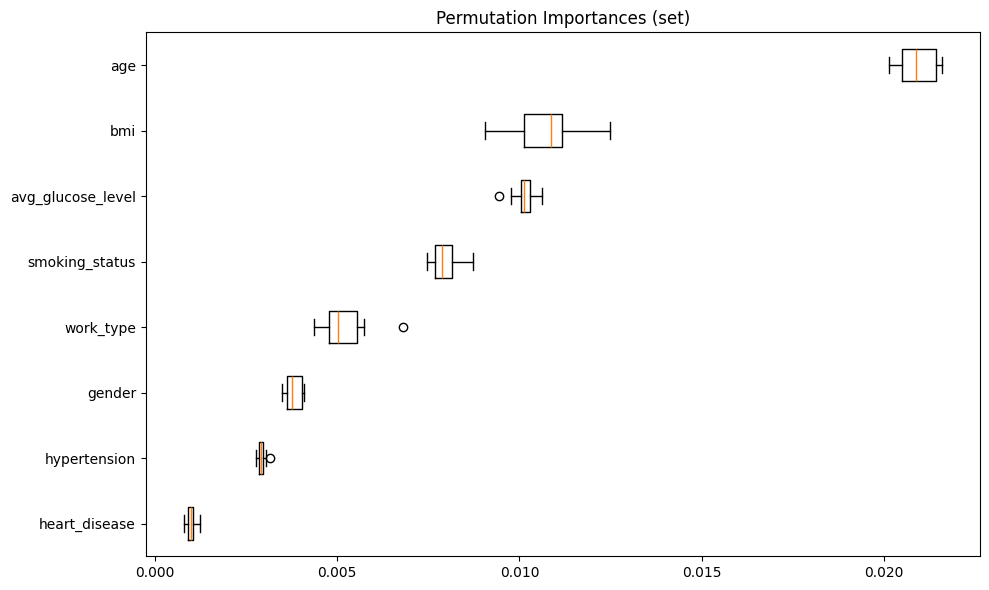

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming you have a trained model named 'best_model' and test data X_test_pass, y_test_pass

# Calculate permutation importance
result = permutation_importance(best_model, X_all_pass, y_all_pass, n_repeats=10, random_state=42, n_jobs=-1)

# Sort feature importances in descending order
sorted_idx = result.importances_mean.argsort()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test_pass.columns[sorted_idx])
ax.set_title("Permutation Importances (set)")
fig.tight_layout()
plt.show()

In [53]:
X_all_pass.columns.tolist()

['gender',
 'hypertension',
 'heart_disease',
 'work_type',
 'smoking_status',
 'age',
 'avg_glucose_level',
 'bmi']

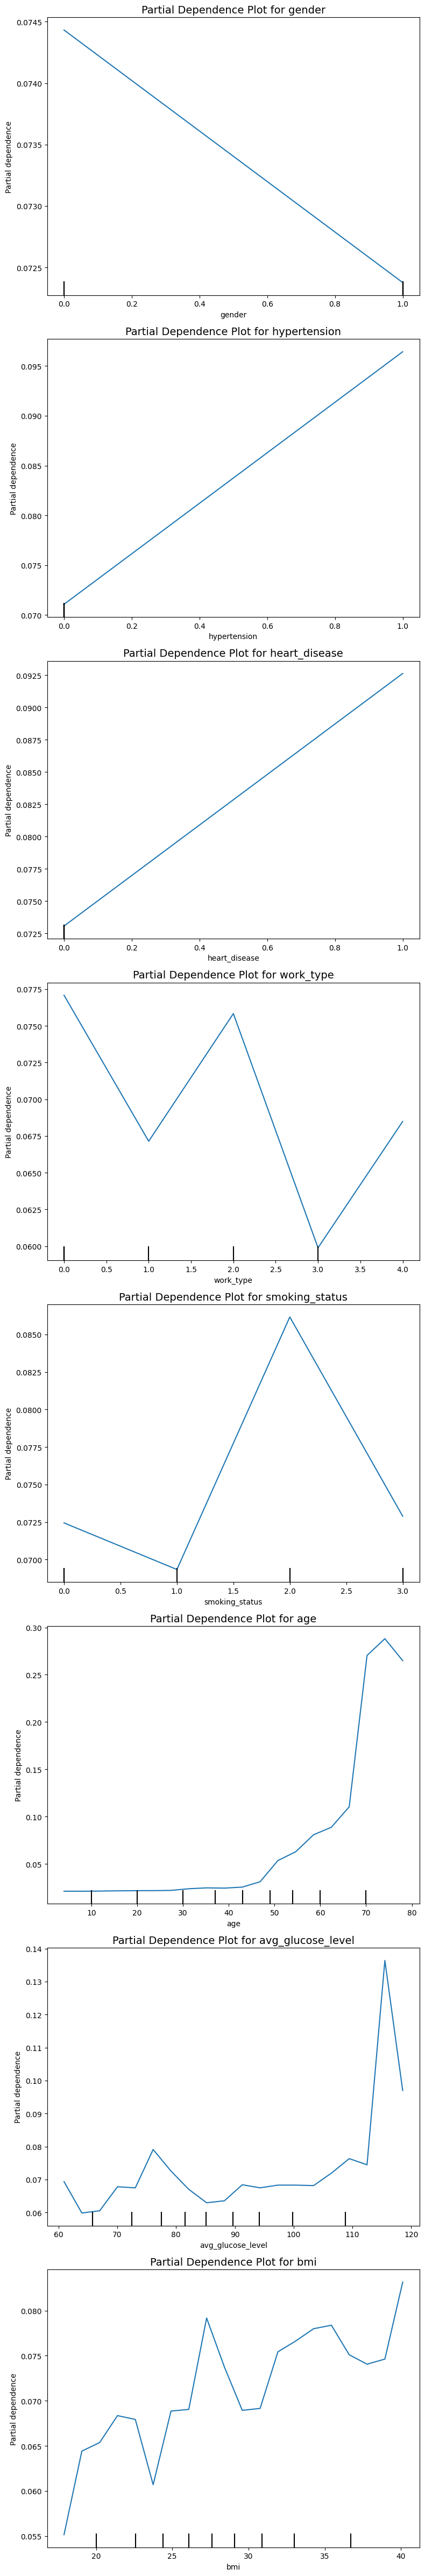

In [54]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming you have a trained model named 'best_model' and test data X_test_pass

# Choose the features you want to plot
features_to_plot = X_all_pass.columns.tolist()

# Create a figure and axes for subplots
num_features = len(features_to_plot)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 6 * num_features))
# Adjust figsize as needed

# Modify the predict method of the best_model to return probabilities
def predict_proba(X):
    return best_model.predict_proba(X)

best_model.predict = predict_proba  # Overwrite the predict method

# Iterate through features and plot on subplots
for i, feature in enumerate(features_to_plot):
    # Create the PartialDependenceDisplay object for the current feature
    # and plot it on the corresponding subplot
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_all_pass,
        [feature],
        kind="average",
        n_jobs=-1,
        grid_resolution=20,
        ax=axes[i]  # Specify the subplot axes
    )

    # Customize the subplot
    axes[i].set_title(f"Partial Dependence Plot for {feature}", fontsize=14)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=12)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

# Split data 2

In [55]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_col' is the target column name
target_col = "stroke"
X = df.drop(columns=[target_col])
y = df[target_col]
y = y.replace({'yes': 1, 'no': 0})

# Split the data using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  object 
 1   hypertension       12242 non-null  object 
 2   heart_disease      12242 non-null  object 
 3   ever_married       12242 non-null  object 
 4   work_type          12242 non-null  object 
 5   residence_type     12242 non-null  object 
 6   smoking_status     12242 non-null  object 
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


<ipython-input-55-39d416b1f2e7>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'yes': 1, 'no': 0})


In [56]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

def get_processor(X_train):
    # Define categorical and numerical features
    # Initial feature identification
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
    # print(categorical_features)
    # print(numerical_features)

    # Reclassify numerical features with < 10 unique values as categorical
    tmp = numerical_features.copy()
    for feature in numerical_features:
        if X_train[feature].nunique() > 2 and X_train[feature].nunique() < 10:
            print(f"Reclassifying {feature} as categorical based on unique values.")
            categorical_features.append(feature)
            tmp.remove(feature)
    numerical_features = tmp
    print(categorical_features)
    print(numerical_features)

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values with median
        # ('scaler', MinMaxScaler())  # Normalize numerical features
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values with most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
    ])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor


In [ ]:
%%capture
!pip install xgboost
!pip install catboost

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier  # Import RandomForestClassifier

def get_gskf_pipeline(X_train, param_grid={}, scoring='roc_auc'):
    # Create the pipeline with preprocessor and model
    preprocessor = get_processor(X_train)

    # Create XGBRFClassifier, CatBoostClassifier, and RandomForestClassifier instances
    estimators = [
        ('xgb', XGBRFClassifier(tree_method='gpu_hist',  # Use GPU for XGBoost
                            scale_pos_weight=2,
                            random_state=42)),
        ('catboost', CatBoostClassifier(task_type='GPU',  # Use GPU for CatBoost
                            scale_pos_weight=2,
                            verbose=0,
                            random_state=42)),
        ('rf', RandomForestClassifier(
            random_state=42,  # Remove scale_pos_weight
            # You can adjust class_weight instead if needed
            class_weight='balanced'  # or 'balanced_subsample'
        ))  # Add RandomForestClassifier
    ]

    # Create a VotingClassifier with the estimators
    ensemble_classifier = VotingClassifier(estimators=estimators, voting='soft')

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', ensemble_classifier)
    ])

    # Create a GridSearchCV object with StratifiedKFold for cross-validation
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=skfold)

    return grid_search


In [60]:
from imblearn.under_sampling import RandomUnderSampler

scaler = MinMaxScaler()
sampler = RandomUnderSampler(random_state=42)

def get_pass_data(X_train, y_train, is_train=True):
    X, y = X_train.copy(), y_train.copy()
    # Select columns
    # X = X.drop(columns=['residence_type', 'ever_married'])

    # Int mapping
    y = y.replace({"yes": 1, "no": 0})

    X = X.replace({"yes": 1, "no": 0})
    X['gender'] = X['gender'].map({
        'male': 0,
        'female': 1,
    }).astype('int')
    if('residence_type' in X.columns):
        X['residence_type'] = X['residence_type'].map({
            'urban': 0,
            'rural': 1,
        }).astype('int')
    X['work_type'] = X['work_type'].map({
        'private': 0,
        'self-employed': 1,
        'govt_job': 2,
        'children': 3,
        'never_worked': 4,
    }).astype('int')
    X['smoking_status'] = X['smoking_status'].map({
        'never smoked': 0,
        'formerly smoked': 1,
        'smokes': 2,
        'unknown': 3,
    }).astype('int')

    # Scaler and sampler
    if(is_train):
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # Define the desired ratio
        # desired_ratio = 5.0
        # n_samples_class_0 = int(desired_ratio * y.value_counts()[1])
        # sampling_strategy = {0: n_samples_class_0, 1: y.value_counts()[1]}
        # global sampler
        # sampler = RandomUnderSampler(sampling_strategy=sampling_strategy,
        #                             random_state=42)
        # X, y = sampler.fit_resample(X, y)
        X.info()
    else:
        # X[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(
        #     X[['age', 'avg_glucose_level', 'bmi']]
        # )

        # X, y = sampler.fit_resample(X, y)
        pass
    return X, y


In [61]:
X_pass, y_pass = get_pass_data(X_train, y_train)
X_test_pass, y_test_pass = get_pass_data(X_test, y_test, False)
X_pass.shape, y_pass.value_counts(), y_test_pass.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 12242 entries, 3485 to 8924
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12242 non-null  int64  
 1   hypertension       12242 non-null  int64  
 2   heart_disease      12242 non-null  int64  
 3   ever_married       12242 non-null  int64  
 4   work_type          12242 non-null  int64  
 5   residence_type     12242 non-null  int64  
 6   smoking_status     12242 non-null  int64  
 7   age                12242 non-null  float64
 8   avg_glucose_level  12242 non-null  float64
 9   bmi                12242 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.0 MB


<ipython-input-60-9f1d1fd8edaf>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})
<ipython-input-60-9f1d1fd8edaf>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})


((12242, 10),
 stroke
 0    11736
 1      506
 Name: count, dtype: int64,
 stroke
 0    2935
 1     126
 Name: count, dtype: int64)

In [62]:
params = {
    # 'classifier__xgb__learning_rate': [0.01, 0.1],
    # 'classifier__xgb__max_depth': [3, 5, 7],
    # 'classifier__xgb__n_estimators': [200, 300, 1000],
    # 'classifier__xgb__scale_pos_weight': [2, 5, 7, 10],
    # 'classifier__catboost__learning_rate': [0.01, 0.1],
    # 'classifier__catboost__depth': [3, 5, 7],
    # 'classifier__catboost__iterations': [200, 300, 1000],
    # 'classifier__catboost__scale_pos_weight': [2, 5, 7, 10],
}
gskfold = get_gskf_pipeline(X_pass, params)
gskfold.fit(X_pass, y_pass)

best_model = gskfold.best_estimator_
y_pred = best_model.predict(X_test_pass)
y_pred

Reclassifying work_type as categorical based on unique values.
Reclassifying smoking_status as categorical based on unique values.
['work_type', 'smoking_status']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'residence_type', 'age', 'avg_glucose_level', 'bmi']


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:57:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:57:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:57:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserW

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
gskfold.best_params_

{}

In [64]:
# Get feature importances from the trained model
# Access the classifier within the pipeline using named steps
xgb_feature_importances = best_model['classifier'].estimators_[0].feature_importances_
catboost_feature_importances = best_model['classifier'].estimators_[1].feature_importances_
rf_feature_importances = best_model['classifier'].estimators_[2].feature_importances_  # Get RandomForest importances

# Calculate average feature importances from all three models
feature_importances = (xgb_feature_importances + catboost_feature_importances + rf_feature_importances) / 3

# Get feature names after preprocessing
feature_names = best_model['preprocessor'].get_feature_names_out()

# Create a DataFrame to store feature importances and names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                   Feature  Importance
5                 num__age   11.164998
7                 num__bmi    7.372642
6   num__avg_glucose_level    6.278826
11        cat__work_type_3    3.005999
3        num__ever_married    2.622466
16   cat__smoking_status_3    0.757472
0              num__gender    0.681250
4      num__residence_type    0.407053
9         cat__work_type_1    0.364603
13   cat__smoking_status_0    0.296278
1        num__hypertension    0.234470
15   cat__smoking_status_2    0.231548
14   cat__smoking_status_1    0.213699
8         cat__work_type_0    0.179833
2       num__heart_disease    0.116922
10        cat__work_type_2    0.057238
12        cat__work_type_4    0.014704


              precision    recall  f1-score   support

           0     0.9652    0.9925    0.9787      2935
           1     0.4884    0.1667    0.2485       126

    accuracy                         0.9585      3061
   macro avg     0.7268    0.5796    0.6136      3061
weighted avg     0.9456    0.9585    0.9486      3061

ROC AUC: 0.8982


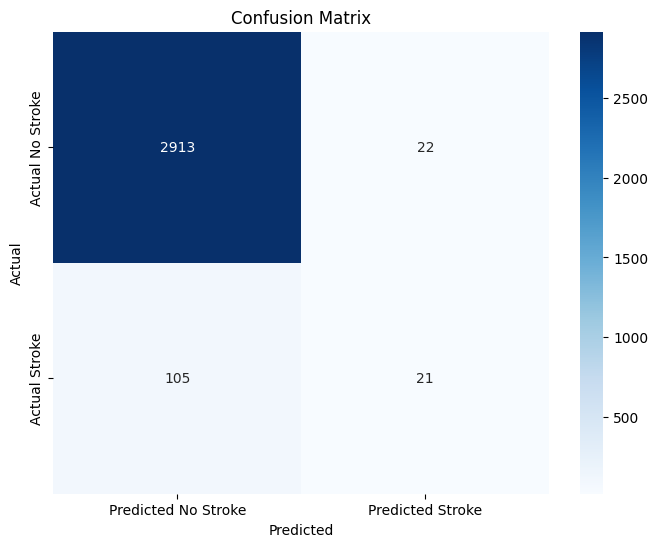

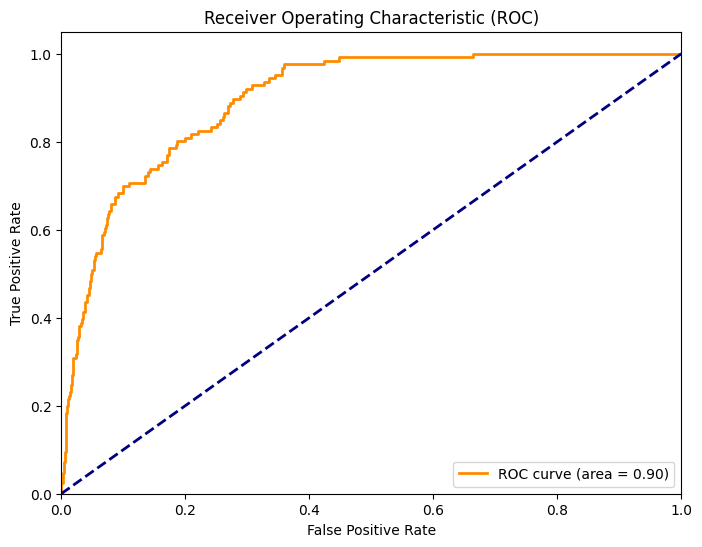

In [65]:
from sklearn.metrics import (precision_score,
                            recall_score,
                            f1_score,
                            roc_auc_score,
                            classification_report,
                            roc_curve)

# Make predictions on the test set
# y_pred
# Calculate evaluation metrics
# precision = precision_score(y_test_pass, y_pred)
# recall = recall_score(y_test_pass, y_pred)
# f1 = f1_score(y_test_pass, y_pred)

# Use the best model (grid_search.best_estimator_) to predict probabilities
roc_auc = roc_auc_score(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])
class_report = classification_report(y_test_pass, y_pred, digits=4)

# Print the evaluation metrics
print(class_report)
print(f"ROC AUC: {roc_auc:.4f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test_pass, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted No Stroke', 'Predicted Stroke'],
            yticklabels=['Actual No Stroke', 'Actual Stroke'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_pass, best_model.predict_proba(X_test_pass)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Validate 2 conclusions by model

In [66]:
X_all_pass, y_all_pass = get_pass_data(X, y, False)
X_all_pass, a, y_all_pass, b = train_test_split(
    X_all_pass, y_all_pass, test_size=0.01, stratify=y_all_pass, random_state=42
)
X_all_pass.shape, y_all_pass.value_counts()

<ipython-input-60-9f1d1fd8edaf>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"yes": 1, "no": 0})


((15149, 10),
 stroke
 0    14523
 1      626
 Name: count, dtype: int64)

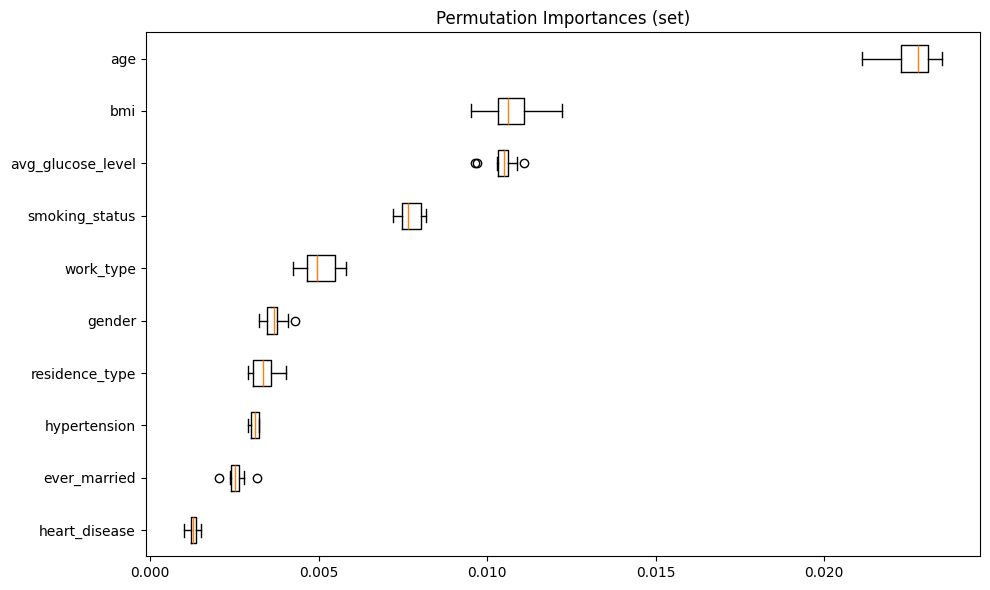

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# Assuming you have a trained model named 'best_model' and test data X_test_pass, y_test_pass

# Calculate permutation importance
result = permutation_importance(best_model, X_all_pass, y_all_pass, n_repeats=10, random_state=42, n_jobs=-1)

# Sort feature importances in descending order
sorted_idx = result.importances_mean.argsort()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test_pass.columns[sorted_idx])
ax.set_title("Permutation Importances (set)")
fig.tight_layout()
plt.show()

In [68]:
X_all_pass.columns.tolist()

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status',
 'age',
 'avg_glucose_level',
 'bmi']

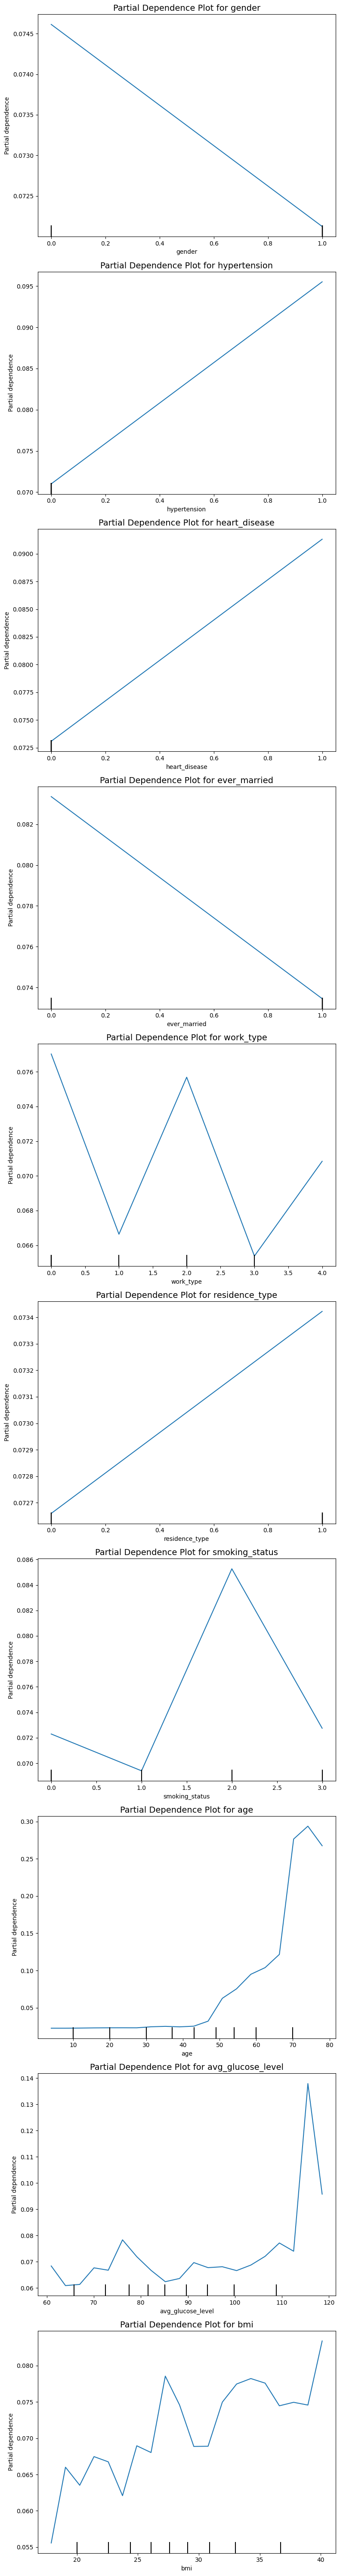

In [69]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming you have a trained model named 'best_model' and test data X_test_pass

# Choose the features you want to plot
features_to_plot = X_all_pass.columns.tolist()

# Create a figure and axes for subplots
num_features = len(features_to_plot)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 6 * num_features))
# Adjust figsize as needed

# Modify the predict method of the best_model to return probabilities
def predict_proba(X):
    return best_model.predict_proba(X)

best_model.predict = predict_proba  # Overwrite the predict method

# Iterate through features and plot on subplots
for i, feature in enumerate(features_to_plot):
    # Create the PartialDependenceDisplay object for the current feature
    # and plot it on the corresponding subplot
    display = PartialDependenceDisplay.from_estimator(
        best_model,
        X_all_pass,
        [feature],
        kind="average",
        n_jobs=-1,
        grid_resolution=20,
        ax=axes[i]  # Specify the subplot axes
    )

    # Customize the subplot
    axes[i].set_title(f"Partial Dependence Plot for {feature}", fontsize=14)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=12)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()